# 1 Effect of Normalization, Feature, Extraction and Distance Metrics
## 1.1 Tasks

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
#Loading Data set
wine_r = pd.read_csv("winequality-red .csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w = wine_w.copy()
# 0 stands for white wine
wine_w[C]= np.zeros(wine_w.shape[0])
# 1 stands for red wine
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])
#wine

In [3]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [4]:
print(wine.shape)
wine[DLC].describe()
wine[DLC].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6    0.0  
1      9.5        6    0.0  
2     10.1        6    0.0  
3      9.9        6    0.0  
4      9.9        6    0.0

### 1.1.1 Train/Test Data Split

In [5]:
from sklearn.preprocessing import StandardScaler

# classify color of wine with all features
X = wine[D].values
y = np.ravel(wine[[C]])
y_quality = np.ravel(wine[L])
ran = 42

X_train, X_test, y_c_train, y_c_test = train_test_split(X, y, test_size=0.2, random_state = ran)
X_train, X_test, y_q_train, y_q_test = train_test_split(X, y_quality, test_size=0.2, random_state = ran)

### 1.1.2 Normalization

In [6]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_transformed = scalar.transform(X_train)
X_test_transformed = scalar.transform(X_test)

#Normalize on whole dataset to use it for visualization
X_transformed = scalar.fit_transform(X)

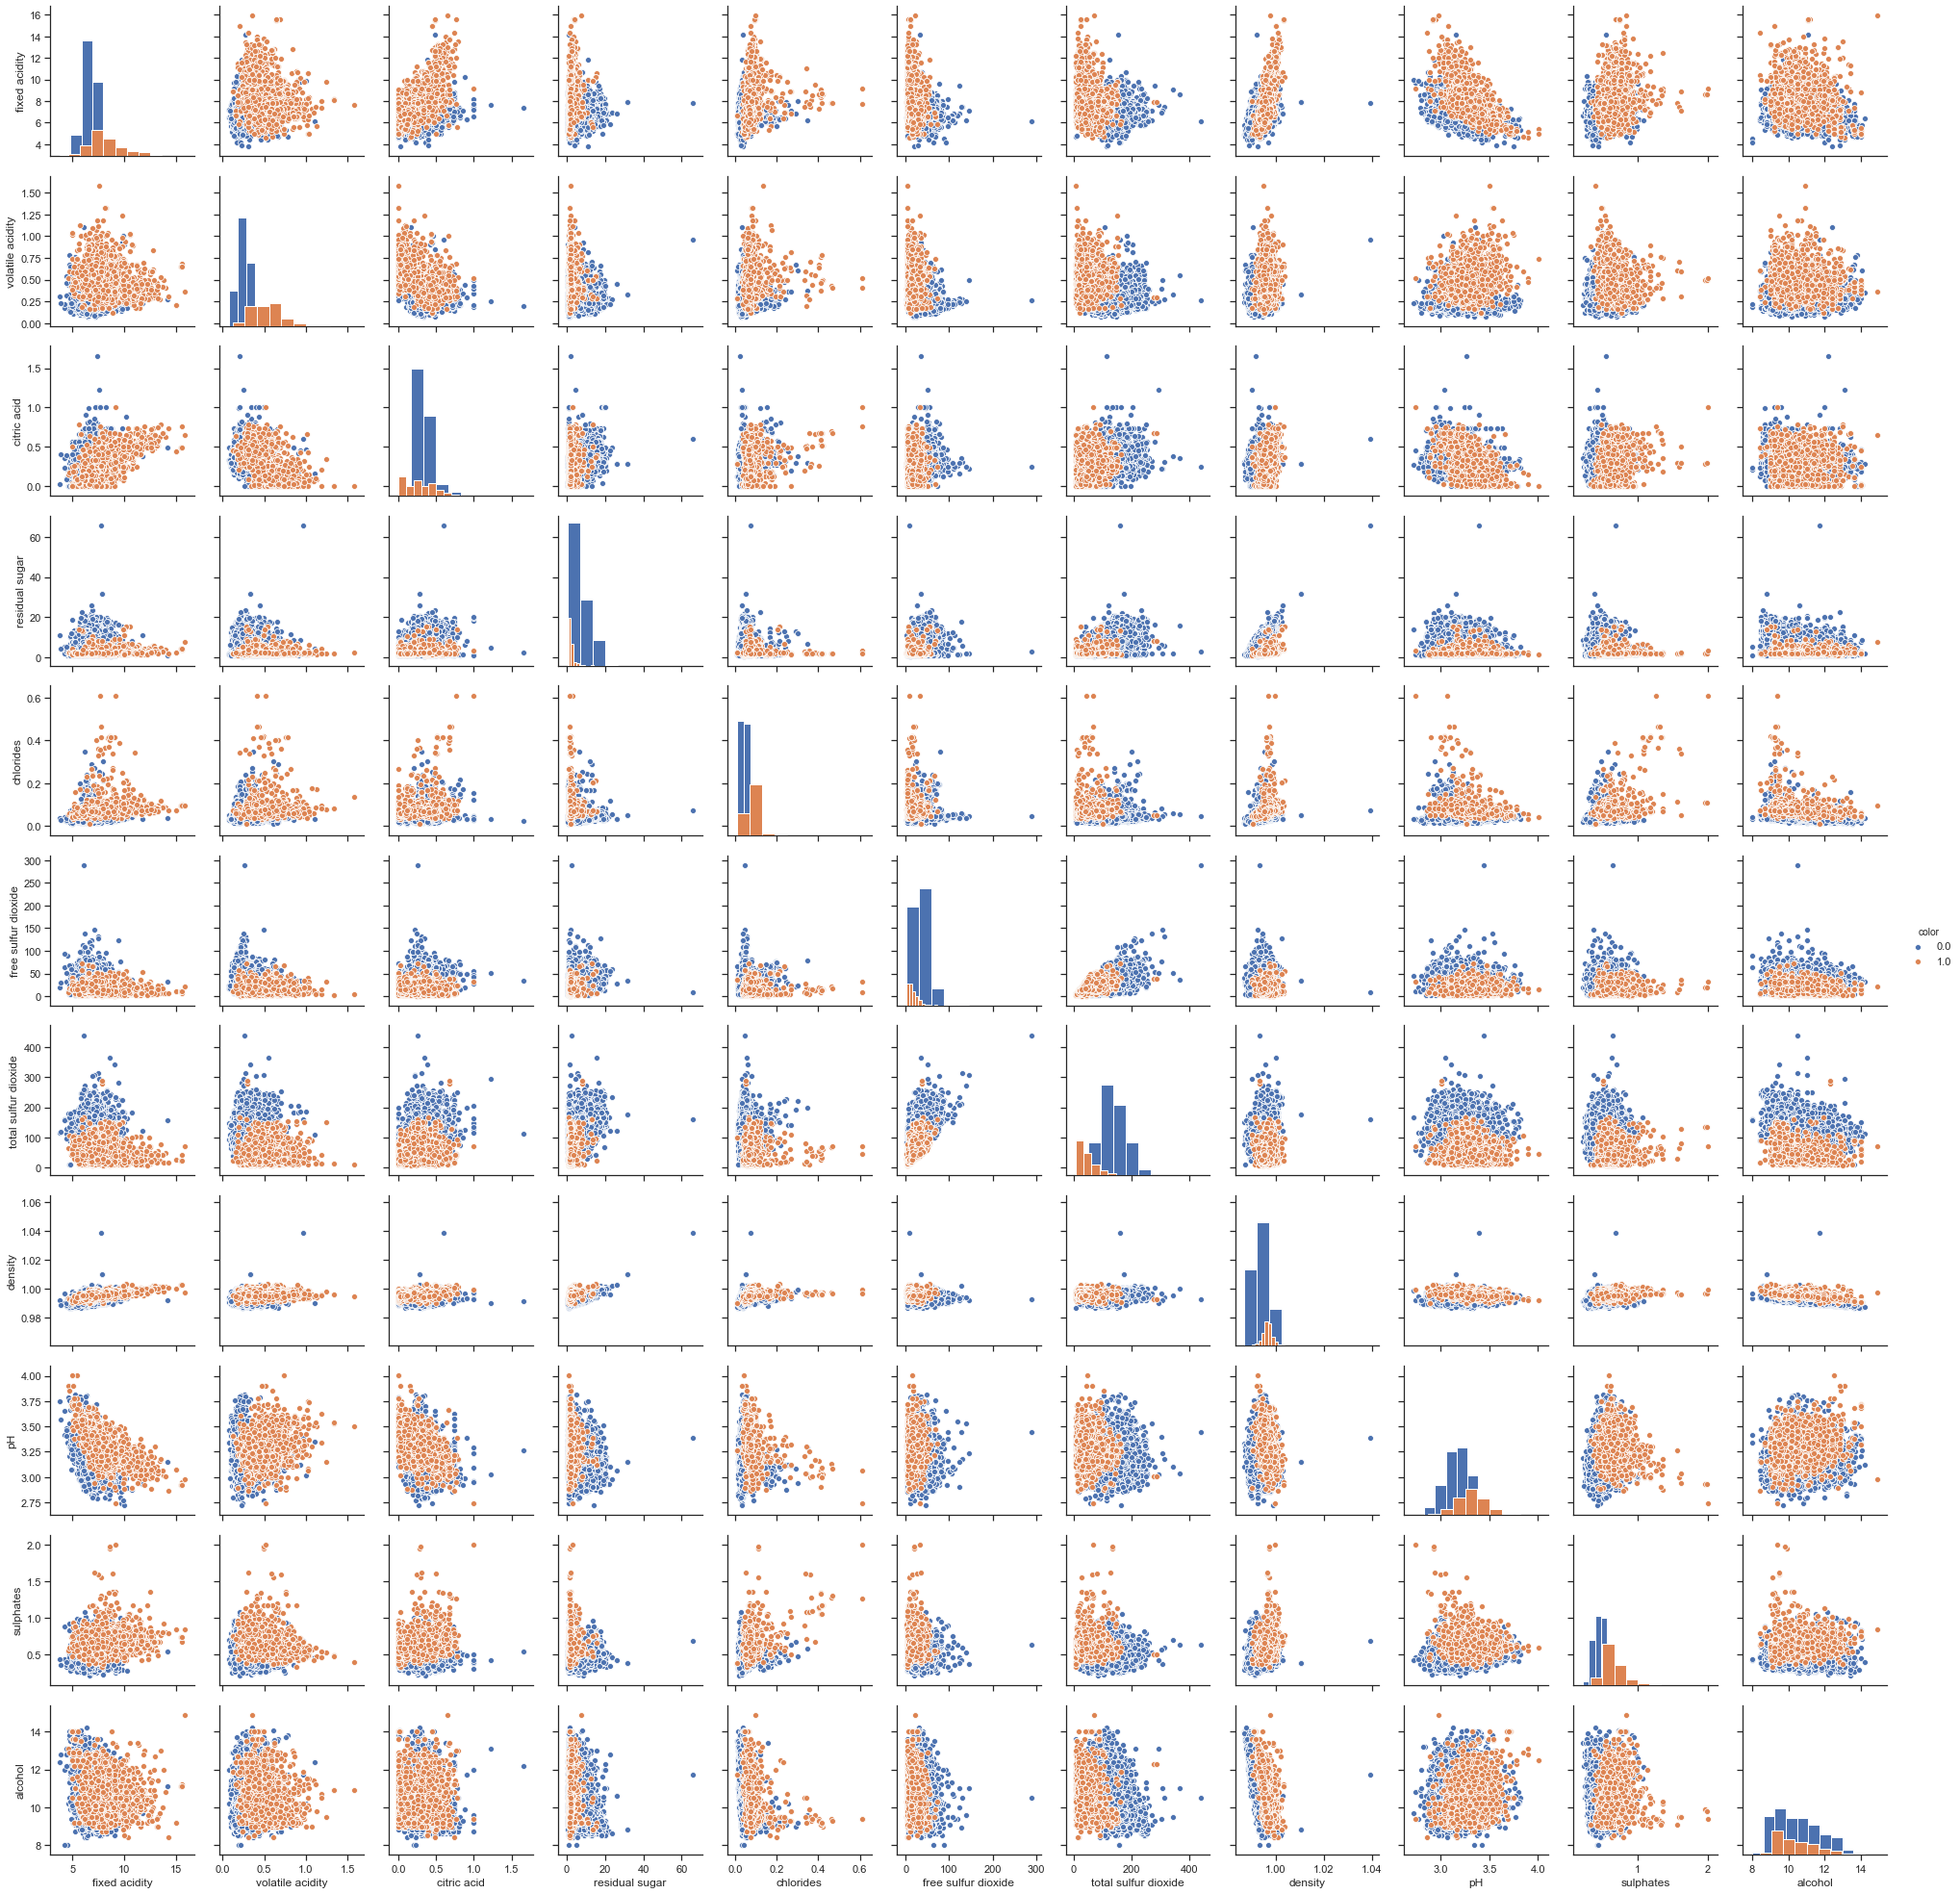

In [7]:
df_X = pd.DataFrame(data = wine[DC])
sns.pairplot(df_X, vars = df_X.columns[:-1], hue = 'color', diag_kind = 'hist')

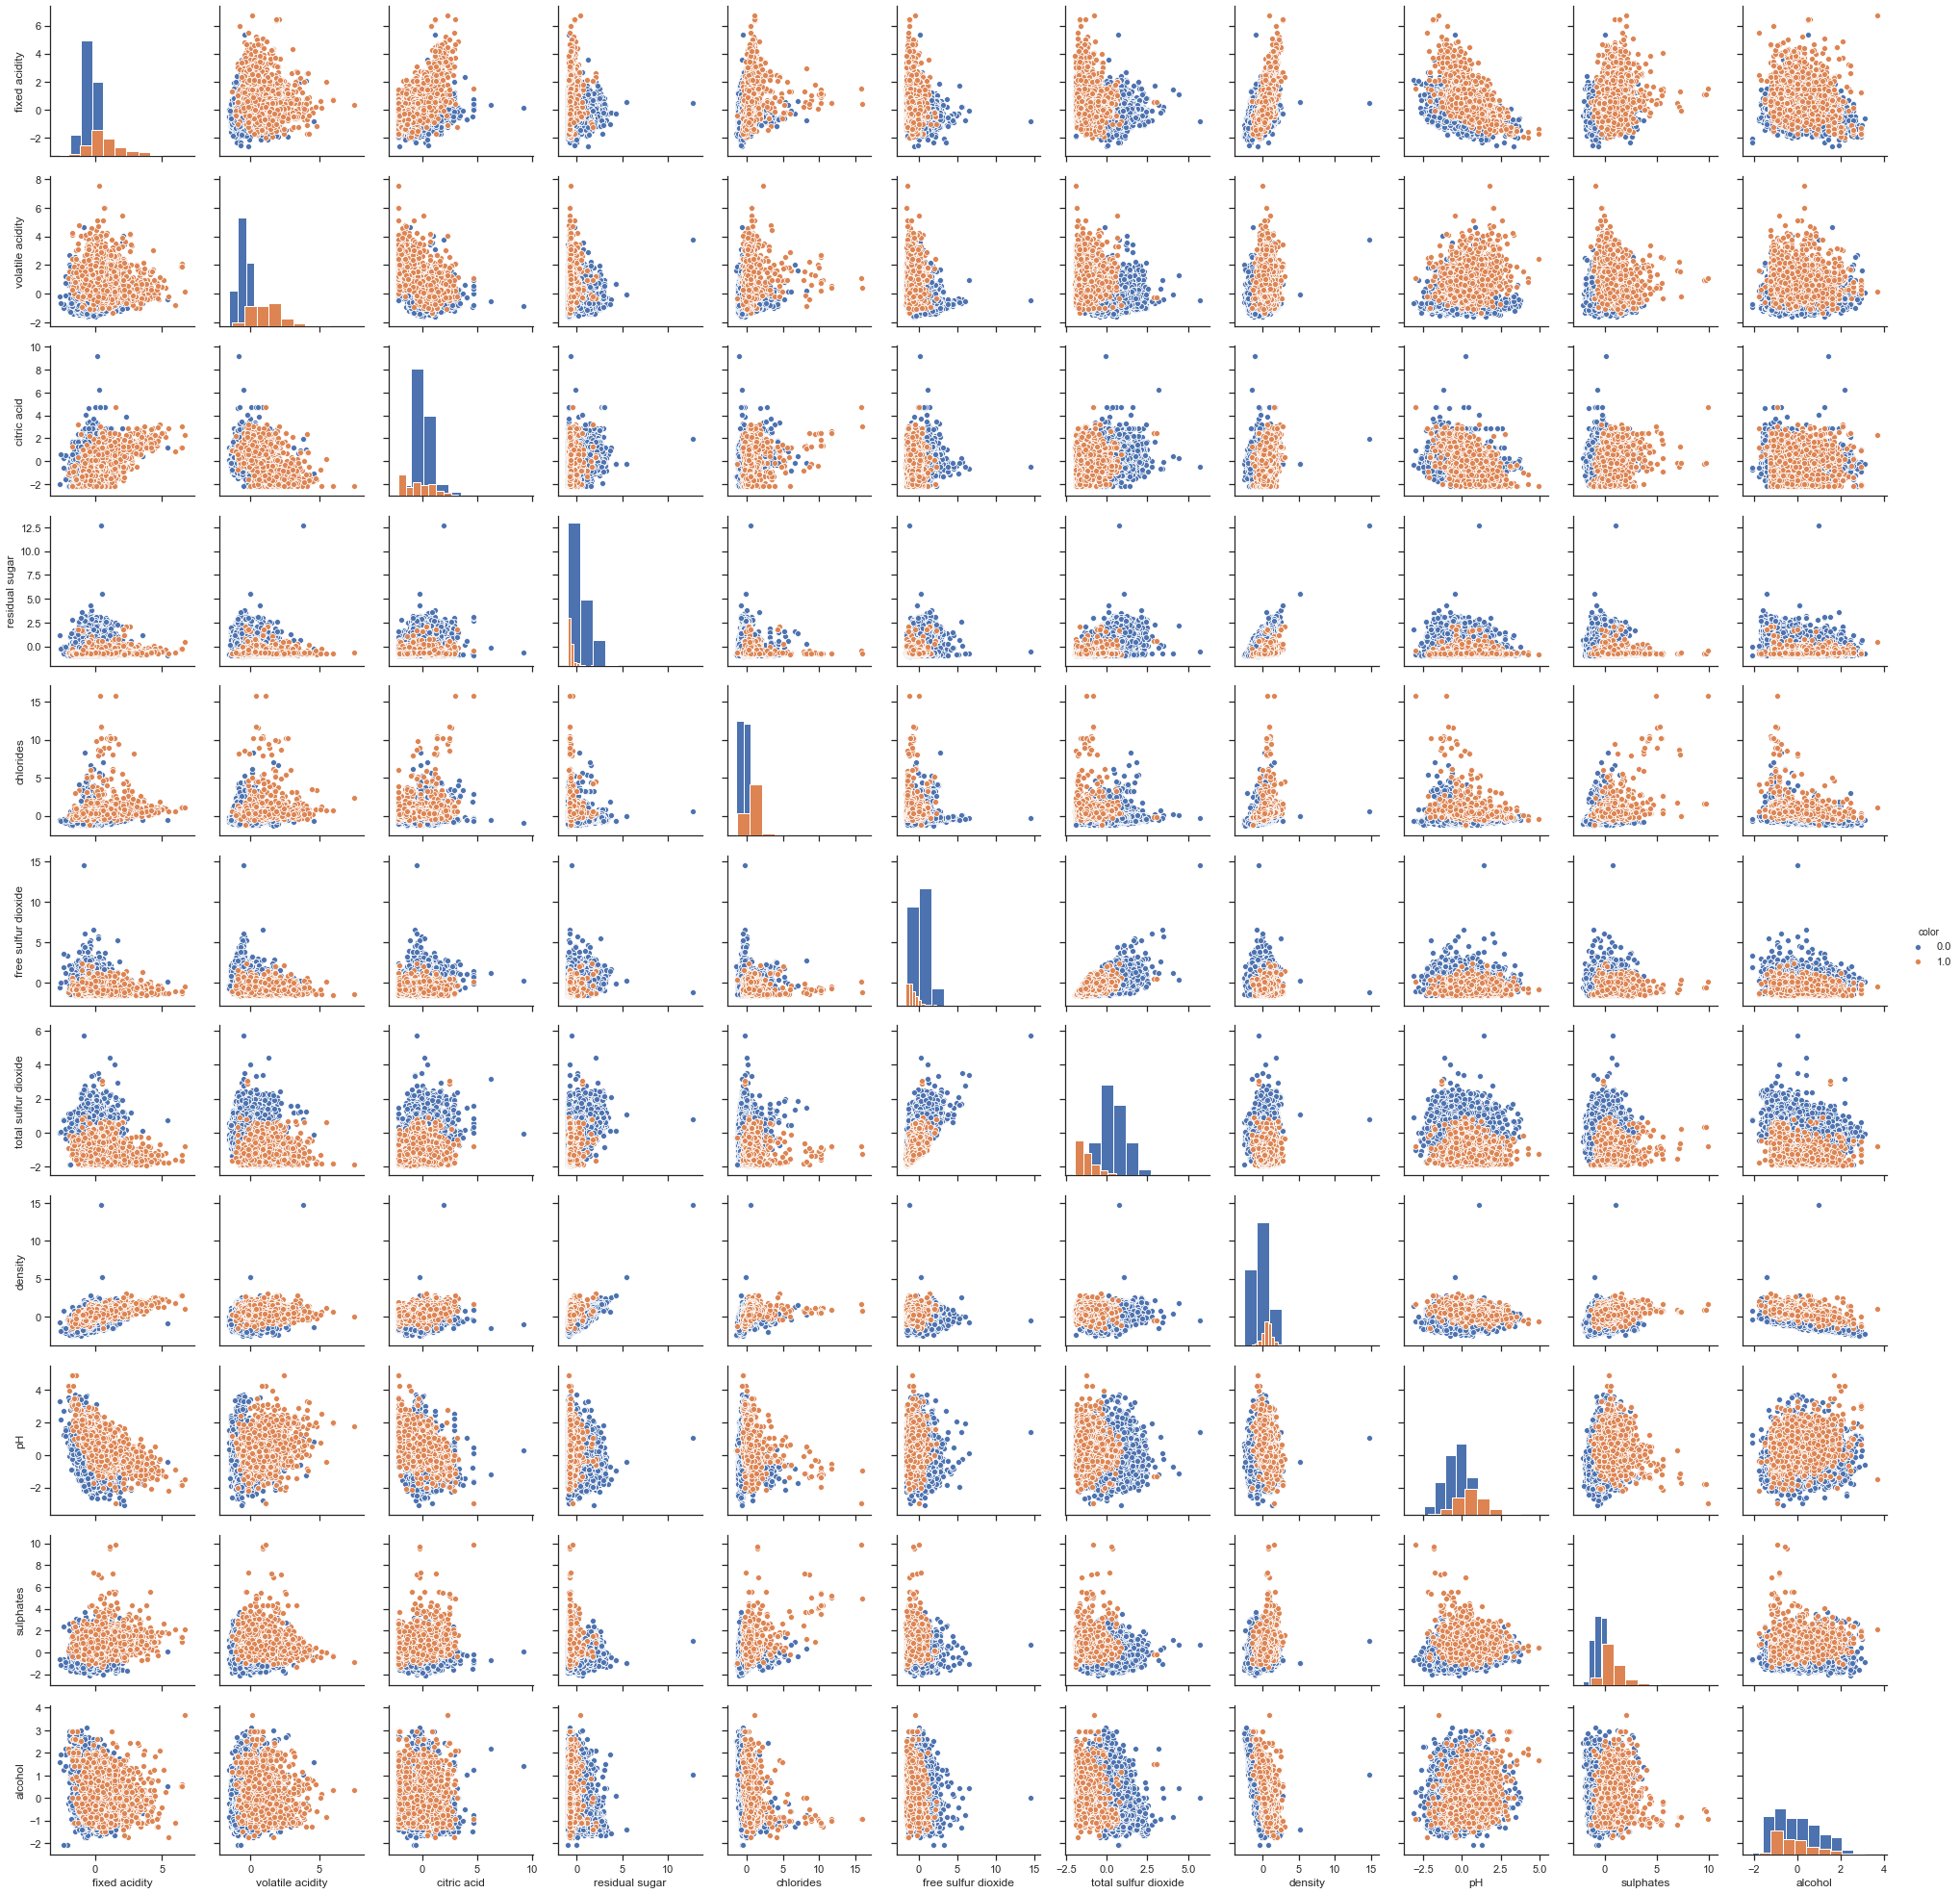

In [8]:
df_X_transformed = pd.DataFrame(data = np.c_[X_transformed, wine[C]], columns = D + [C])
sns.pairplot(df_X_transformed, vars = df_X_transformed.columns[:-1], hue = 'color', diag_kind = 'hist')

#### Comparing Pairplot for normalized and non- nonrmalized features
It can be depicted from the above pair plots,

the normalized plots are a bit more symmetric and not tend to look too elliptical compared to non-normalized plots.
I believe as the normalized plot, are Z-score normalized and hence they represent the variation of normalized variance among the features, whereas the non-normalized plot show variation of features among each other. Hence, the non-normalized plot tend to look affected by the actual values (cause of different scales of each feature), and hence do not provide a clear picture of variations of variances amongst dieffrent features.

Z-score converts all features to a common scale with an average of zero and standard deviation of one. The average of zero means that it avoids introducing aggregation distortions stemming from differences in feature means.

As different features have different scales, normalizing these features by z-score would make the plots normalized, the plots would still show the relationship between two variables maintaining the dispersion between features but would be less affected by the difference in scales of features.


### 1.1.3 Classification

### Classification on Color with Normalized data

In [9]:
n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_train_transformed, y_c_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    #p = 1 for manhatten distance
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(X_train_transformed, y_c_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    #p = 2 for euclidean distance
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(X_train_transformed, y_c_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()
#acc


uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.971388   0.975913   0.972594
std     0.138749   0.139392   0.138921
min     0.000000   0.000000   0.000000
25%     0.990000   0.994615   0.990769
50%     0.990769   0.995385   0.991538
75%     0.990769   0.996154   0.992308
max     0.995385   0.996923   0.996154

Text(0, 0.5, 'Accuracy(%)')

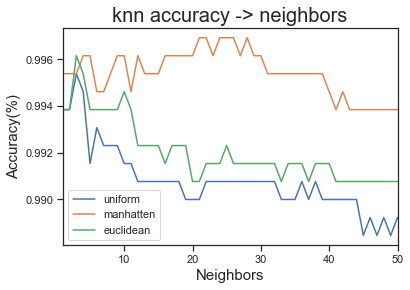

In [10]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

### Classification on Wine Quality with Normalized data

In [11]:
X_train_transformed, X_test_transformed, y_q_train, y_q_test = train_test_split(X_transformed, y_quality, test_size=0.2, random_state = ran)

n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transformed, y_q_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(X_train_transformed, y_q_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(X_train_transformed, y_q_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.552021   0.670241   0.665581
std     0.079833   0.096622   0.095789
min     0.000000   0.000000   0.000000
25%     0.555000   0.683077   0.676923
50%     0.560000   0.688462   0.681538
75%     0.568077   0.690769   0.685385
max     0.630000   0.695385   0.690000

Text(0, 0.5, 'Accuracy(%)')

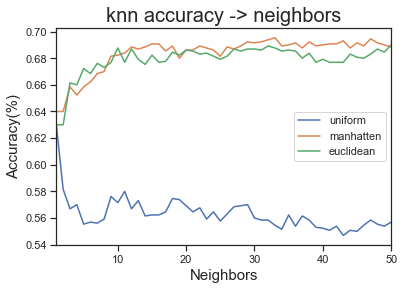

In [12]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

### 1.1.4 Feature Selection
#### Feature selection for Color

Text(0.5, 1, 'Heatmap of Correlation matrix with Color')

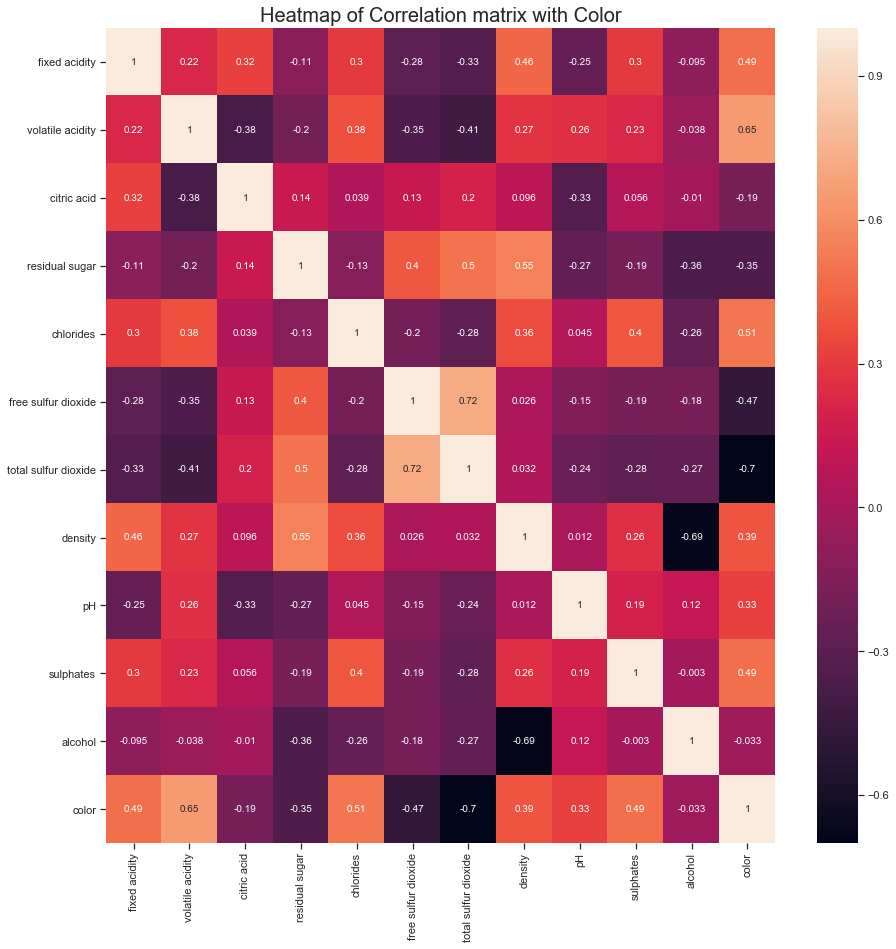

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(wine[DC].corr(), annot = True)
plt.title('Heatmap of Correlation matrix with Color', fontsize = 20)

In [14]:
# Selected features based on correlation between feature and target variable color
# Selected features are volatile acidity(index:1, corr: 0.65), chlorides(index:4, corr: 0.51), 
# total sulfur dioxide(index:6, corr: -0.7), sulphates(index:9, corr: 0.49)

x = np.c_[X[:, 1].reshape(6497,1), X[:, 4].reshape(6497,1), X[:, 6].reshape(6497,1), X[:, 9].reshape(6497,1)]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = ran) 

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(x_train, y_c_train)
    y_pred = neigh.predict(x_test)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(x_train, y_c_train)
    y_pred = neigh.predict(x_test)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(x_train, y_c_train)
    y_pred = neigh.predict(x_test)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.967858   0.968477   0.968959
std     0.138241   0.138329   0.138396
min     0.000000   0.000000   0.000000
25%     0.986538   0.987692   0.987692
50%     0.986923   0.987692   0.988462
75%     0.987692   0.987692   0.988462
max     0.990000   0.990769   0.990000

Text(0, 0.5, 'Accuracy(%)')

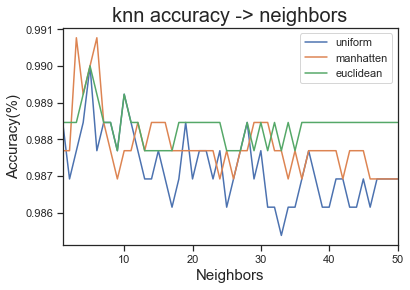

In [15]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

#### Feature selection for Quality

Text(0.5, 1, 'Heatmap of Correlation matrix with Quality')

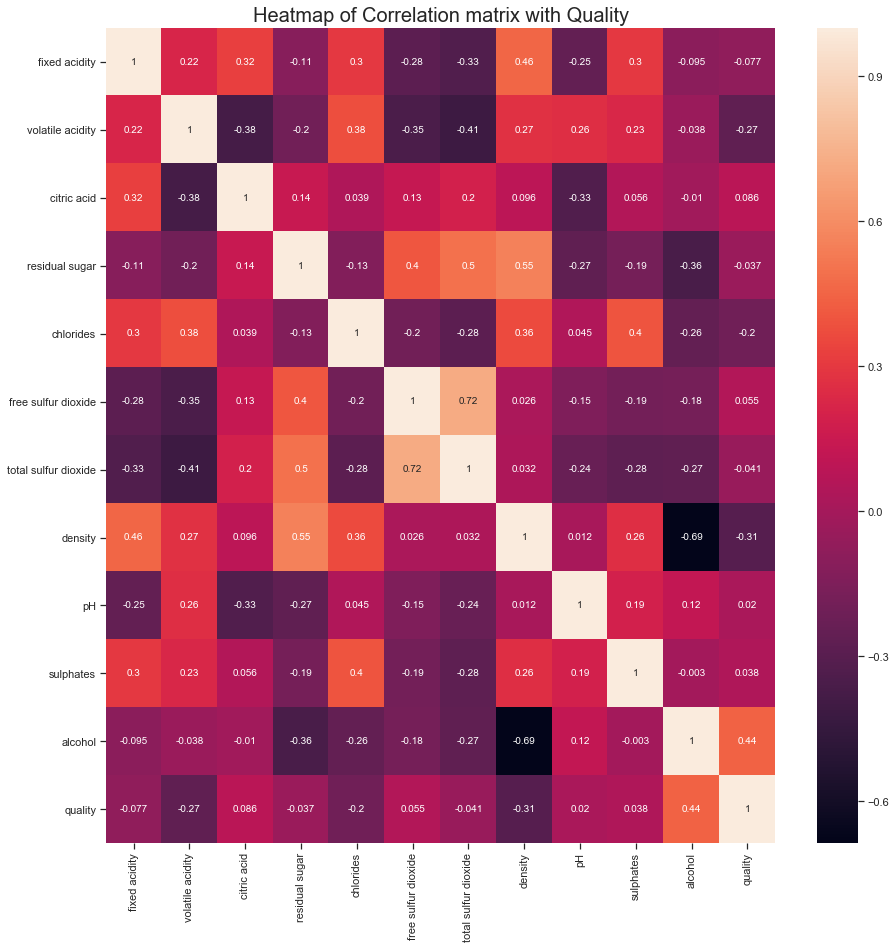

In [16]:
plt.figure(figsize = (15,15))
hm = sns.heatmap(wine[DL].corr(), annot = True)
plt.title('Heatmap of Correlation matrix with Quality', fontsize = 20)

In [17]:
# Selected features based on correlation between feature and target variable quality
# Selected features are volatile acidity(index:1, corr: -0.27), chlorides(index:4, corr: -0.2), 
# density(index:7, corr: -0.31), alcohol(index:10, corr: 0.44)

x = np.c_[X[:, 1].reshape(6497,1), X[:, 4].reshape(6497,1), X[:, 7].reshape(6497,1), X[:, 10].reshape(6497,1)]

x_train, x_test, y_train, y_test = train_test_split(x, y_quality, test_size=0.2, random_state = ran) 

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(x_train, y_q_train)
    y_pred = neigh.predict(x_test)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(x_train, y_q_train)
    y_pred = neigh.predict(x_test)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(x_train, y_q_train)
    y_pred = neigh.predict(x_test)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.536576   0.649397   0.645264
std     0.077320   0.094943   0.094460
min     0.000000   0.000000   0.000000
25%     0.540769   0.663077   0.655385
50%     0.547692   0.668462   0.666923
75%     0.552308   0.673846   0.670000
max     0.591538   0.681538   0.678462

Text(0, 0.5, 'Accuracy(%)')

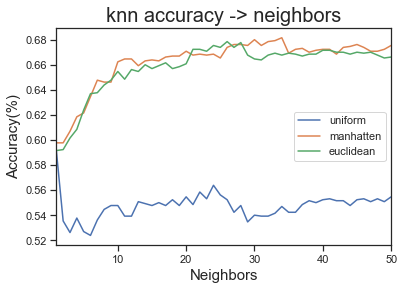

In [18]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

### 1.1.5 Feature Extraction
#### 1.1.5.1 Feature Extraction using PCA, Target Variable: Color for 5 components

In [19]:
from sklearn.decomposition import PCA

#X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state = ran) 
pca = PCA(n_components=5, random_state=ran)
pca.fit(X_train_transformed)
train_PCA = pca.transform(X_train_transformed)
data_PCA = pca.transform(X_test_transformed)

# Classification after PCA
n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(train_PCA, y_c_train)
    y_pred = neigh.predict(data_PCA)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(train_PCA, y_c_train)
    y_pred = neigh.predict(data_PCA)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(train_PCA, y_c_train)
    y_pred = neigh.predict(data_PCA)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.967119   0.969276   0.969261
std     0.138142   0.138442   0.138441
min     0.000000   0.000000   0.000000
25%     0.985385   0.988462   0.988462
50%     0.986154   0.988462   0.988462
75%     0.987692   0.988462   0.989231
max     0.991538   0.990769   0.991538

Text(0, 0.5, 'Accuracy(%)')

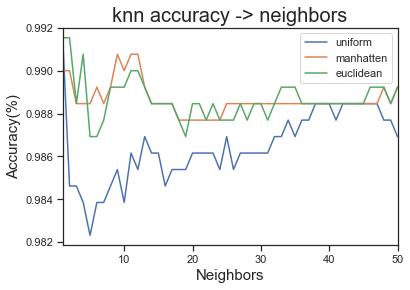

In [20]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

#### 1.1.5.1 Feature extraction using PCA, Target Variable: Wine Quality for 5 components

In [21]:
from sklearn.decomposition import PCA

#X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y_quality, test_size=0.2, random_state = ran)
pca = PCA(random_state=ran, n_components=5)
pca.fit(X_train_transformed)
train_PCA = pca.transform(X_train_transformed)
test_PCA = pca.transform(X_test_transformed)

# Classification after PCA using Quality as a target
n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(train_PCA, y_q_train)
    y_pred = neigh.predict(test_PCA)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(train_PCA, y_q_train)
    y_pred = neigh.predict(test_PCA)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(train_PCA, y_q_train)
    y_pred = neigh.predict(test_PCA)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.517210   0.639804   0.640588
std     0.075819   0.092200   0.091874
min     0.000000   0.000000   0.000000
25%     0.519231   0.650000   0.648846
50%     0.524615   0.656154   0.656154
75%     0.528462   0.659231   0.660000
max     0.630769   0.666154   0.664615

Text(0, 0.5, 'Accuracy(%)')

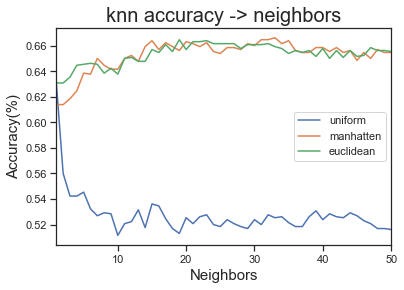

In [22]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

#### 1.1.5.2 Feature extraction using LDA, Target Variable: Color

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transformed, y_c_train)
train_LDA = lda.transform(X_train_transformed)
data_LDA = lda.transform(X_test_transformed)
data_LDA.shape

# Classification after LDA

n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(train_LDA, y_c_train)
    y_pred = neigh.predict(data_LDA)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(train_LDA, y_c_train)
    y_pred = neigh.predict(data_LDA)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(train_LDA, y_c_train)
    y_pred = neigh.predict(data_LDA)
    accscore = accuracy_score(y_c_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.974465   0.973167   0.973167
std     0.139182   0.138997   0.138997
min     0.000000   0.000000   0.000000
25%     0.993846   0.992308   0.992308
50%     0.993846   0.992308   0.992308
75%     0.994615   0.993077   0.993077
max     0.994615   0.993077   0.993077

Text(0, 0.5, 'Accuracy(%)')

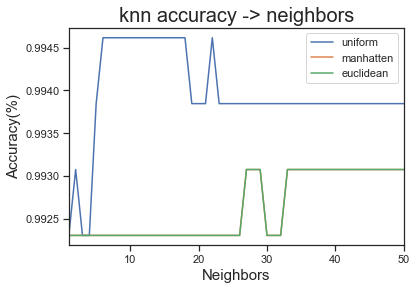

In [24]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

#### 1.1.5.2 Feature extraction using LDA, Target variable: Wine Quality

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y_quality, test_size=0.2, random_state = ran)
lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(X_train_transformed, y_q_train)
train_LDA = lda.transform(X_train_transformed)
test_LDA = lda.transform(X_test_transformed)

# Classification after LDA using Quality as a target

n_neighborslist = list(range(1,51))
col_names=['uniform', 'manhatten', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(train_LDA, y_q_train)
    y_pred = neigh.predict(test_LDA)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(train_LDA, y_q_train)
    y_pred = neigh.predict(test_LDA)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(train_LDA, y_q_train)
    y_pred = neigh.predict(test_LDA)
    accscore = accuracy_score(y_q_test, y_pred)
    acc.at[k,col_names[2]] = accscore

acc.describe()

uniform  manhatten  euclidean
count  51.000000  51.000000  51.000000
mean    0.540468   0.651267   0.648884
std     0.077884   0.094198   0.093965
min     0.000000   0.000000   0.000000
25%     0.545769   0.658846   0.658077
50%     0.550769   0.667692   0.668462
75%     0.555385   0.673462   0.670000
max     0.604615   0.682308   0.674615

Text(0, 0.5, 'Accuracy(%)')

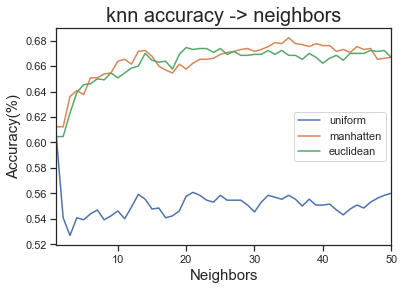

In [26]:
graph = acc[1:].plot.line()
graph.set_title('knn accuracy -> neighbors', fontsize = 20)
graph.set_xlabel("Neighbors", fontsize = 15)
graph.set_ylabel("Accuracy(%)", fontsize = 15)

#### Comparison between PCA and LDA for color as a target variable
Comparing the KNN classification accuracy on PCA and LDA features, maximum accuracy achieved using LDA features for color as a  target variable is 99.46% which is greater than the accuracy obtained using PCA features of 99.23%. Thus can conclude that LDA works better compared to PCA in this case.

#### Comparison between PCA and LDA for quality as a target variable
Comparing the KNN classification accuracy on PCA and LDA features, maximum accuracy achieved using LDA features for quality target variable is 68.23% which is greater than the accuracy obtained using PCA features of 66.69% respectively. Thus can conclude that LDA works better compared to PCA in this case.

### 1.1.6 Analysis and Discussion

#### 1.1.6.1 k-plots:
All the k-plots are plotted above.

#### 1.1.6.2 Features
From the correlation heatmap plotted for feature selection methods and by looking at the scatter plots, we can say that following features have higher effect on each other :
1. Free sulfur dioxide and total sulfur dioxide share have a correlation of .72 and share 51.84% of variance.<br>
2. Alcohol and density share a correlation of -.69 and hence share a medium variance of 47.61 % of variance. <br>
3. Residual sugar and density share a high correlation of .55 and hence share 30.25 % of variance. <br>
4. Fixed acidity and density share a correlation of 0.46 and hence share 21.16% of variance. <br>


#### 1.1.6.3 Selected Features

1. The best accuracy achieved on wine color using KNN is 99.61% , where as best accuracy achieved on color using selected features, 'volatile acidity', 'chlorides', 'total sulfur dioxide' and 'sulphates' is 99.07%.<br>
2. The best accuracy achieved on wine quality using KNN is 69.46% , whereas best accuracy acheived on quality using selected features as 'volatile acidity', 'chlorides', 'density' and 'alcohol' is 68.15%.<br>
3. It can be seen that better accuracy is achieved using the full features instead of a selection of features.<br>
4. The best performance of PCA(with 5 components) on wine color is achieved as 99.15%, whereas best performance of PCA(with 5 components) on wine quality as 66.69 %<br>
5. The best performance of LDA (1 component) for wine color is achieved as 99.46% and best performance of LDA (5 component) for wine quality is achieved as 68.23% <br>

To conclude, we can say that PCA(5 components) and LDA(1 component) performed better for wine color prediction compared to four features selected using the correlation among features and wine colors. Whereas, In the case of wine quality prediction, four selected features based model (using correlation among features and wine quality), performed better than PCA(5 components) based model, but could not perform better than LDA(5 components).

#### 1.1.6.4 PCA vs. LDA

1. From the above k-plots of KNN classification accuracy for different features from the dataset, PCA and LDA, it can be depicted that using PCA or LDA for n_components = 5 does not result into better accuracy than the accuracy obtained using given dataset features.<br><br>

2. Comparing the KNN classification accuracy on PCA and LDA features, maximum accuracy achieved using LDA features for color and quality target variables are 99.46% and 68.23% which is greater than the accuracy obtained using PCA features of 99.15% and 66.69% respectively. Thus can conclude that LDA works better compared to PCA in this case.<br><br>

3. Normalization does affect the performance of PCA. In PCA we are interested in the components that maximize the variance. If one component (e.g. density) varies less than another (e.g. free sulfur dioxide) because of their respective scales($g/cm^3$, $ppm$), PCA might determine that the direction of maximal variance more closely corresponds with the ‘density’ axis, if those features are not scaled, which would be incorrect.<br> [Reference: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html]<br><br> However, Normalization does not affect the LDA. LDA is the classification technique using target variable to separate variables in the lower dimension. It tries to minimise the variance within$(S_W)$ group and maximise the separation between$(S_B)$ the group which is not affected by the normalization.
<br>[Reference: https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step]
<br>

#### 1.1.6.5 Plot

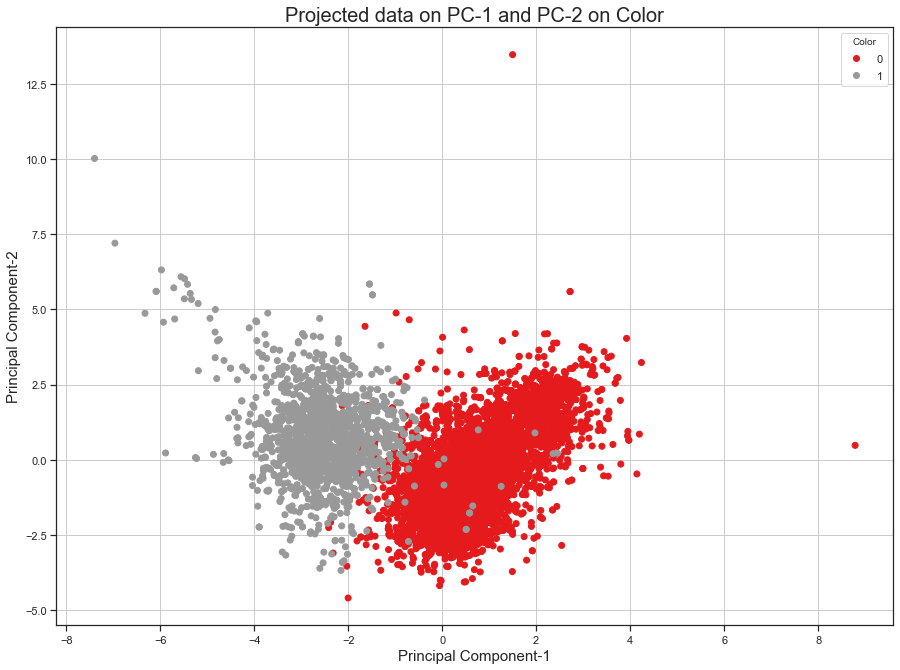

In [27]:
#To plot the PCA and LDA I have used whole dataset
pca = PCA(n_components = 2, random_state=ran)
pca.fit(X_transformed)
projected_data_C = pca.transform(X_transformed)
df_PCA_C = pd.DataFrame(np.c_[projected_data_C[:,0], projected_data_C[:,1], wine[C]], columns = ['PC0', 'PC1', C])

plt.figure(figsize = (15,11))
scatter = plt.scatter(df_PCA_C.loc[:,'PC0'], df_PCA_C.loc[:,'PC1'], c = df_PCA_C.loc[:, 'color'], cmap = 'Set1')
plt.xlabel('Principal Component-1', fontsize = 15)
plt.ylabel('Principal Component-2', fontsize = 15)
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper right", title="Color")
plt.title('Projected data on PC-1 and PC-2 on Color', fontsize = 20)
plt.grid(True)

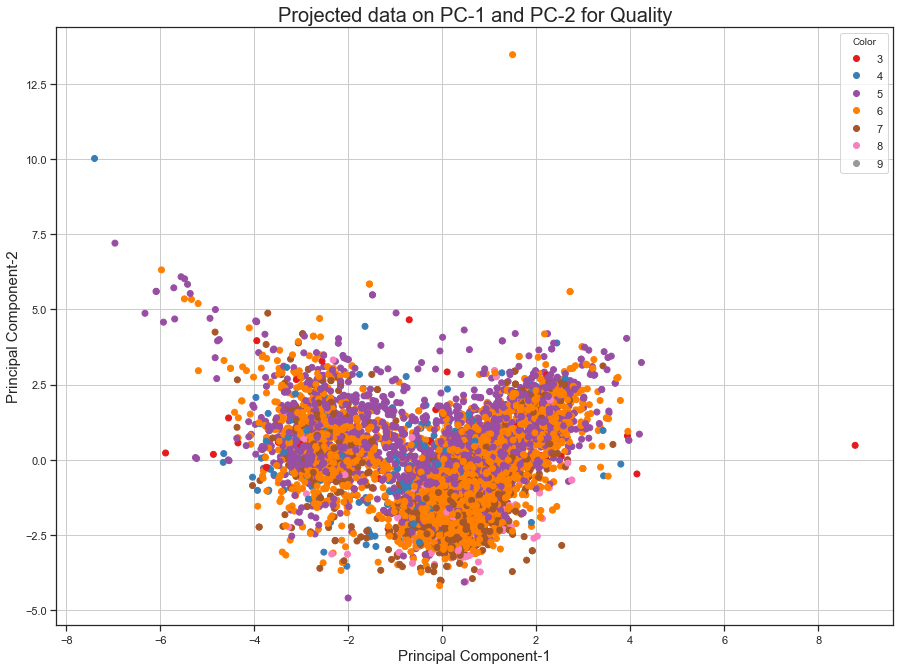

In [28]:
df_PCA_Q = pd.DataFrame(np.c_[projected_data_C[:,0], projected_data_C[:,1], wine[L]], columns = ['PC0', 'PC1', L])
plt.figure(figsize = (15,11))
scatter = plt.scatter(df_PCA_Q.loc[:,'PC0'], df_PCA_Q.loc[:,'PC1'], c = df_PCA_Q.loc[:,'quality'], cmap = 'Set1')
plt.xlabel('Principal Component-1', fontsize = 15)
plt.ylabel('Principal Component-2', fontsize = 15)
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper right", title="Color")
plt.title("Projected data on PC-1 and PC-2 for Quality", fontsize = 20)
plt.grid(True)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


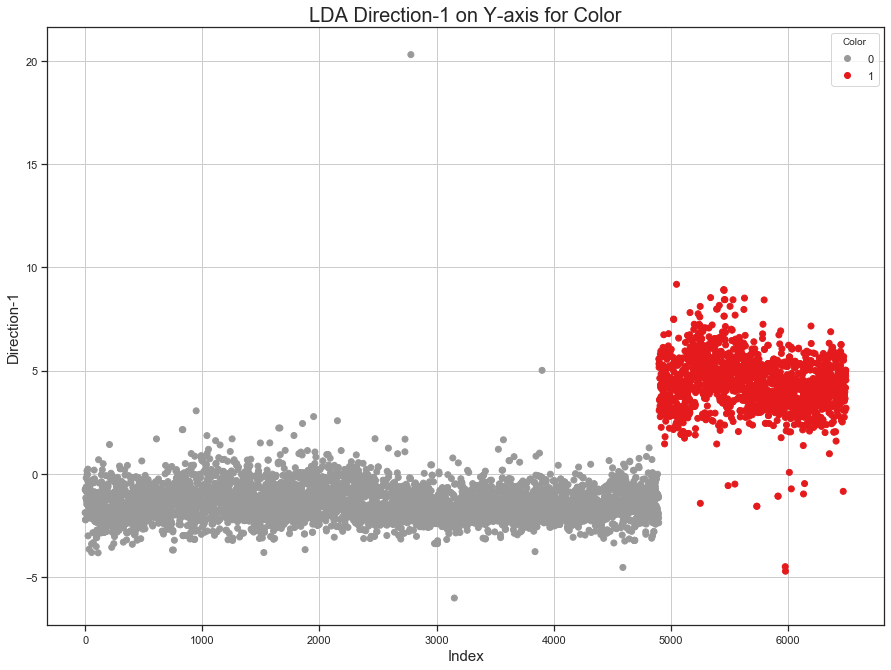

In [29]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_transformed, y)
projected_data_C = lda.transform(X_transformed)

df_LDA_C = pd.DataFrame(np.c_[np.arange(len(projected_data_C)), projected_data_C[:,0], y], columns = ['Length','D1', C])

plt.figure(figsize = (15,11))
scatter = plt.scatter(df_LDA_C.loc[:,'Length'], df_LDA_C.loc[:,'D1'], c = df_LDA_C['color'], cmap = 'Set1_r')
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Direction-1', fontsize = 15)
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper right", title="Color")
plt.title("LDA Direction-1 on Y-axis for Color", fontsize = 20)
plt.grid(True)

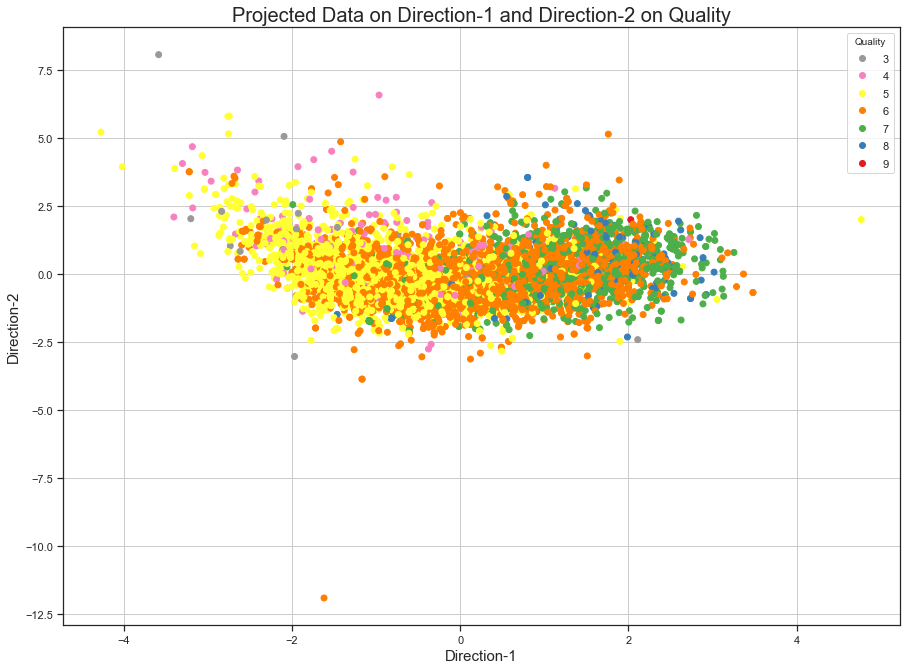

In [30]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X_transformed, wine[L])
projected_data_Q = lda.transform(X_transformed)
df_LDA_Q = pd.DataFrame(np.c_[projected_data_Q[:,0], projected_data_Q[:,1], wine[L]], columns = ['D0','D1', L])

plt.figure(figsize = (15,11))
scatter = plt.scatter(df_LDA_Q.loc[:,'D0'], df_LDA_Q.loc[:,'D1'], c = df_LDA_Q['quality'], cmap = 'Set1_r')
plt.xlabel('Direction-1', fontsize = 15)
plt.ylabel('Direction-2', fontsize = 15)
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper right", title="Quality")
plt.title("Projected Data on Direction-1 and Direction-2 on Quality", fontsize = 20)
plt.grid()

By looking at the above plots and comparing these plots with pairplots plotted above, we have the following observation :
- PCA and LDA plots are more informative compared to pairplots, and it is easier to comprehend data on the projected axis of PCA and LDAs.
- In PCA, data is projected into principal axis which are orthogonal to each other (thus having a correlation = 0), whereas in pair plots the feature axis might share some correlation. This independence of principal components (among each other) helps in better visualization of data, as can be seen for wine color data projection on first two principal components.
- The basis for LDA is to maximize separation among different classes while minimizing variance within all classes, thus it is expected from LDA to perform better for separating target variables. This can be seen from the plots above, The projection of wine quality data on LDA components gives good information about data separability compared to pair plots.

To conclude, it can be said, the projection of data on PCA and LDA components is better representative of separation of classes, as these components are formed using all the data features to maintain maximum data variance and to maximize separation between classes while minimizing variance shared among all classes respectively. Thus a few components obtained using PCA and LDA(few plots using few components) might summarize the dataset well compared to same number of features used directly from dataset. 

# 2 Linear Dimensionality Reduction

## 2.1 Dataset


In [31]:
df = pd.read_csv('DataB.csv')
digit_array = np.asarray(df.iloc[:, 1:785])
print(digit_array.shape)
df

(2066, 784)


Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  \
0              1      4      4      3      0      0      4      2      1   
1              2      5      1      4      3      1      3      5      1   
2              3      1      3      0      3      1      1      0      1   
3              4      5      3      2      3      5      2      2      0   
4              5      3      5      3      3      0      4      1      1   
5              6      0      0      1      5      0      5      2      4   
6              7      1      3      3      5      3      2      4      4   
7              8      3      3      0      5      2      1      2      5   
8              9      5      0      3      3      1      3      0      0   
9             10      5      5      4      5      3      1      0      0   
10            11      1      4      2      1      4      4      3      5   
11            12      5      2      2      2      4      1      4      3   
12            13      5      4      1      0      1      1      3      4   
13            14      2      1      0      3      2      0      5      2   
14            15      4      3      4      4      2      2      4      1   
15            16      1      1      4      1      3      3      4      2   
16            17      2      2      1      2      4      4      2      2   
17            18      5      4      1      0      5      4      3      5   
18            19      4      1      2      2      1      0      3      1   
19            20      5      2      4      4      1      2      3      1   
20            21      3      2      4      3      2      2      3      1   
21            22      0      2      3      4      5      2      1      5   
22            23      4      4      5      3      2      0      5      4   
23            24      5      5      5      4      4      3      0      1   
24            25      3      1      1      0      1      3      2      3   
25            26      4      1      3      1      1      1      5      1   
26            27      4      4      2      2      5      2      2      2   
27            28      2      2      0      4      5      1      3      5   
28            29      3      5      4      4      3      1      0      3   
29            30      1      5      2      0      3      4      4      1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2036        2037      1      1      4      1      4      3      1      2   
2037        2038      2      2      1      3      3      0      5      3   
2038        2039      3      1      3      0      4      2      3      4   
2039        2040      4      3      1      3      3      1      2      3   
2040        2041      1      5      3      1      2      2      3      0   
2041        2042      2      1      0      3      3      1      3      3   
2042        2043      4      5      5      4      2      2      5      5   
2043        2044      3      2      3      0      0      3      4      0   
2044        2045      5      1      2      2      3      3      4      0   
2045        2046      1      3      0      2      5      4      4      1   
2046        2047      4      5      4      0      2      3      0      3   
2047        2048      3      3      3      0      3      0      3      0   
2048        2049      1      0      4      0      3      1      5      2   
2049        2050      2      2      3      5      1      5      3      2   
2050        2051      2      1      0      5      3      4      0      3   
2051        2052      3      1      5      2      1      5      3      2   
2052        2053      4      0      2      2      4      2      1      2   
2053        2054      1      5      4      3      1      5      2      3   
2054        2055      4      4      1      4      1      3      0      3   
2055        2056      4      2      4      4      4      3      1      1   
2056        2057      2      4      5      4      1   

## 2.2 Principal Component Analysis
### 2.2.1 Practical Questions

#### (1) Compute eigenvectors and eigenvalues

In [32]:
digit_array = np.asarray(df.iloc[:, 1:785])
scalar = StandardScaler()
digit_array = scalar.fit_transform(digit_array)
digit_mean = np.mean(digit_array, axis = 0)
# centralized feature matrix
c = digit_array - digit_mean

#covarience of feature matrix
cov = ((c.T).dot(c) / (digit_array.shape[0] - 1))

#eigenvalues and eigenvectors of covariance matrix
eigenvals, eigenvects = np.linalg.eig(cov)

# Make a list of (eigenvalue, eigenvector) tuples
eigenpairs = [(np.abs(eigenvals[i]), eigenvects[:,i]) for i in range(len(eigenvals))]

eigenpairs.sort()
eigenpairs.reverse()

In [33]:
print('Eigen Vectors: ', eigenvects, '\n')
print('Eigen Values: ', eigenvals)

Eigen Vectors:  [[-0.00197863  0.00493308 -0.00037529 ... -0.00088801  0.00013358
   0.00062295]
 [-0.00151307 -0.00640373  0.00258725 ... -0.00427817 -0.00274212
   0.00837347]
 [ 0.00049178 -0.00156563 -0.00372451 ... -0.00288963 -0.00445827
  -0.00683485]
 ...
 [ 0.0001125   0.00300533 -0.00335936 ...  0.00488054 -0.00245866
   0.00039547]
 [ 0.00132315  0.00947149  0.00553066 ...  0.01563742  0.01026383
   0.01070597]
 [-0.00591181  0.00287621  0.00624184 ...  0.00172455 -0.00383851
   0.00246361]] 

Eigen Values:  [5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.01821733e+00 6.72923900e+00
 6.17171361e+00 6.03035494e+00 5.97218819e+00 5.74588510e+00
 5.56641979e+00 5.34085526e+00 5.30999748e+00 5.07244463e+00
 4.90219996e+00 4.74032764e+00 4.46040954e+00 4.43875834e+00
 4.37522974e+00 4.24991493e+00 4.19736144e+00 4.

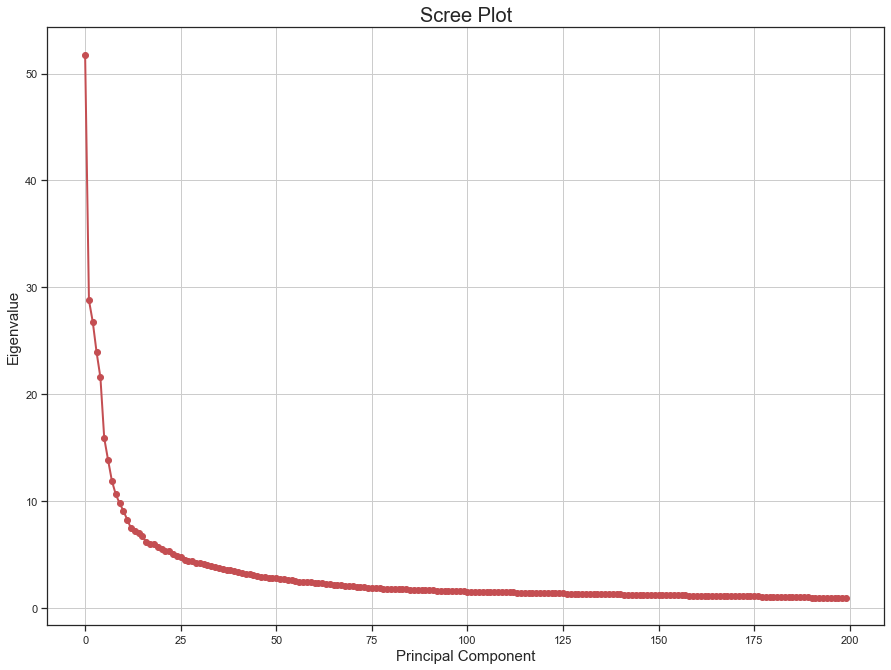

In [34]:
# Screeplot
number_of_components = [x for x in range(0, 200)]
plt.figure(figsize = (15,11))
plt.plot(number_of_components, sorted(eigenvals[:200], reverse=True), 'ro-', linewidth=2)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()

#### Discussion on choosing cut-off

 - Looking at the above scree plot of the principal components and their corresponding eigen values, it can be observed that with increase in the index of the principal components their corresponding eigen value decreases. Moreover, decrease in the eigen values are very steep for the initial principal components while after certain value they seem to have approximately equal value which can be observed at approximately 370th principal component.

 - Moreover, similar threshold might also be obtained by plotting the cumulative variance explained by the principal component. Looking at the below plotted graph it can be depicted that the 95% variance of the total data can be explained using the first 373 principal components.

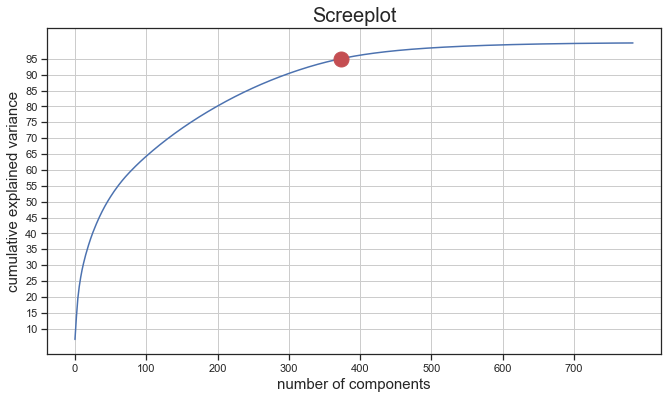

In [35]:
tot = sum(eigenvals)
var_exp = [(i / tot)*100 for i in sorted(eigenvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize = (11,6))
plt.plot(cum_var_exp)
plt.plot(373, 95, 'ro', ms = 15)
plt.xlabel('number of components', fontsize = 15)
plt.ylabel('cumulative explained variance', fontsize = 15)
plt.title('Screeplot', fontsize = 20)
plt.xticks(np.arange(0, 800, 100))
plt.yticks(np.arange(10, 100, 5))
plt.grid()

#### (2) Subplot for top-20 eigenvalues

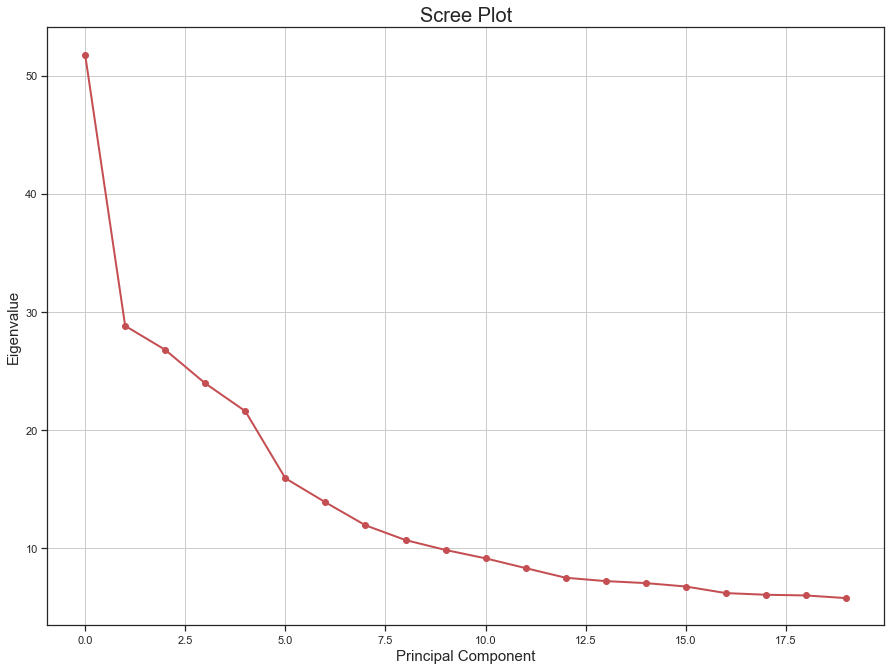

In [36]:
# Screeplot
number_of_components = [x for x in range(0, 20)]
plt.figure(figsize = (15,11))
plt.plot(number_of_components, sorted(eigenvals[:20], reverse=True), 'ro-', linewidth=2)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()

In [37]:
eigenpairs_PCA = [(np.abs(eigenvals[i]), eigenvects[:,i]) for i in range(len(eigenvals))]
# sort the array on eigenvalues in the descending order
eigenpairs_PCA.sort()
eigenpairs_PCA.reverse()

matrix_w_PCA = eigenpairs_PCA[0][1].reshape(784,1)
for i in range(1,20):
    matrix_w_PCA = np.hstack((matrix_w_PCA, eigenpairs_PCA[i][1].reshape(784,1)))

# project the data on the principal components
projected_data_PCA = c.dot(matrix_w_PCA)

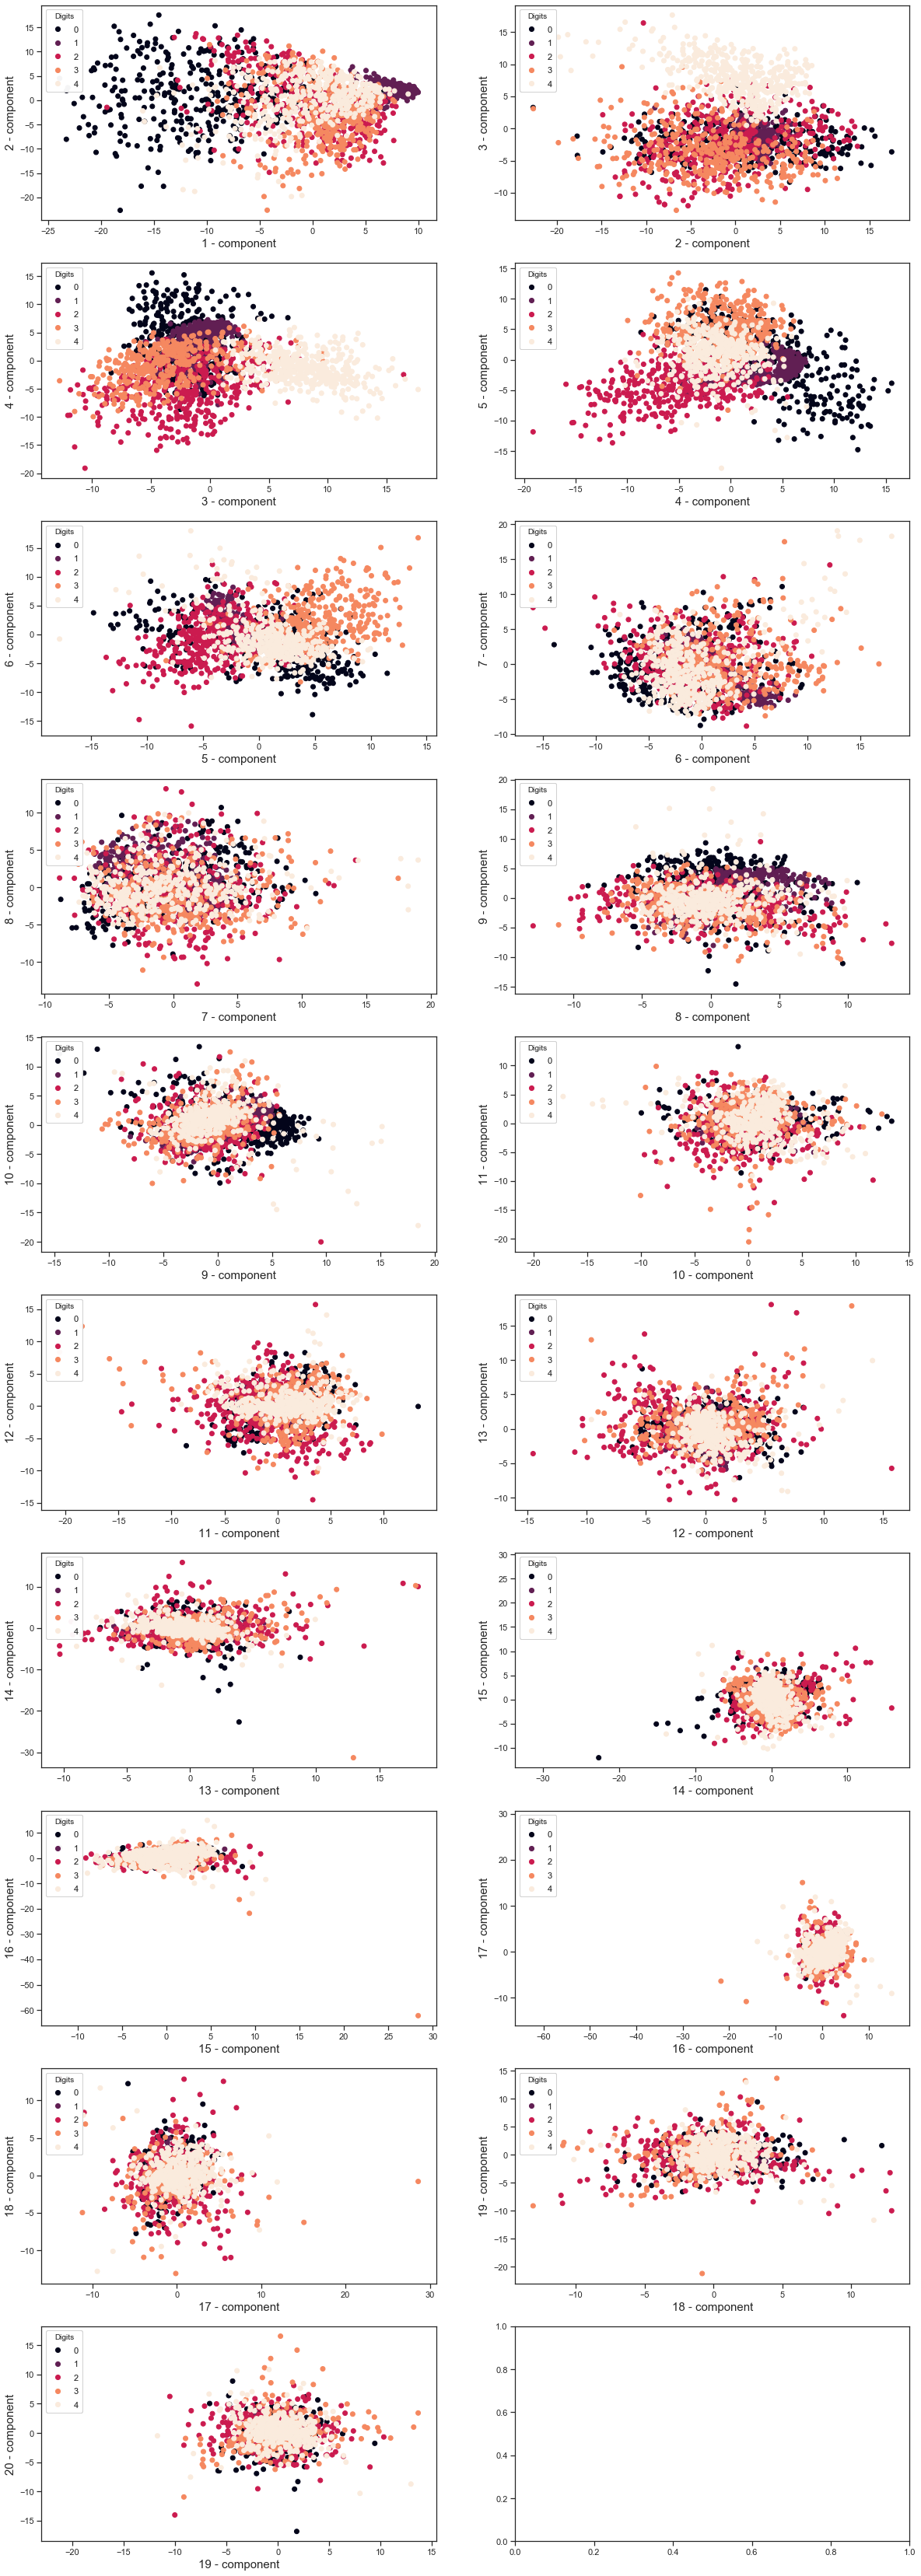

In [38]:
grid_row = 10
grid_column = 2 
fig, axs = plt.subplots(grid_row, grid_column, figsize=(20,60))

count = 0
flag = False
for row in range(0, grid_row):
    for column in range(0, grid_column):
        scatter = axs[row,column].scatter(projected_data_PCA[:,count], projected_data_PCA[:,count+1], c = df['gnd'])
        legend1 = axs[row,column].legend(*scatter.legend_elements(prop = 'colors'),
                    loc="upper left", title="Digits")
        axs[row, column].add_artist(legend1)
        axs[row, column].set_xlabel(str(count+1) + ' - component', fontsize = 15)
        axs[row, column].set_ylabel(str(count+2) + ' - component', fontsize = 15)
        count += 1
        if(count == 19):
            flag = True
            break;
    if(flag):
        break;

- The above plots show the scatter plot of the transformed data on the top 20 principal components corresponding, it can be observed from the range of the variance(range of axis) described by each principal component that variance decreases with an increase in the number of principal components.

- Looking at the range of variance explained by principal components it can be seen, the range of variance explained decreases as the eigenvalues corresponding to these principal components decrease. Also, it can be observed from the 5th plot that variance along principal components 13 and 14 drops drastically, this effect can also be seen from scree plotted for the first 20 eigenvectors.

#### 3) Plots for PC-1 vs PC-2 and PC-5 vs PC-6

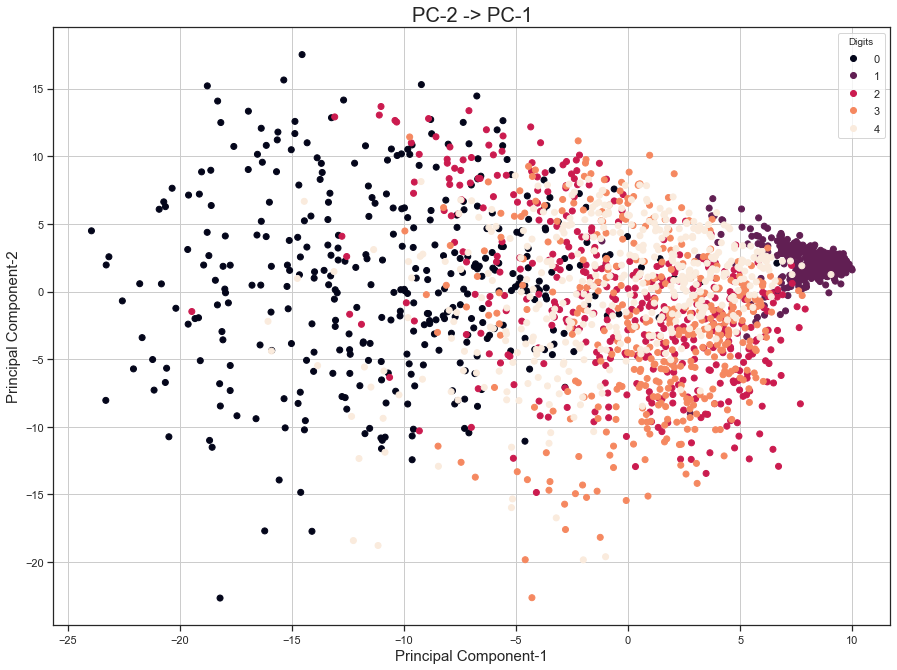

In [39]:
plt.figure(figsize = (15,11))
plt.scatter(projected_data_PCA[:,0], projected_data_PCA[:,1], c = df['gnd'])
plt.xlabel('Principal Component-1', fontsize = 15)
plt.ylabel('Principal Component-2', fontsize = 15)
plt.title('PC-2 -> PC-1', fontsize = 20)
plt.legend(*scatter.legend_elements(prop = 'colors'),
                    loc="upper right", title="Digits")
plt.grid()

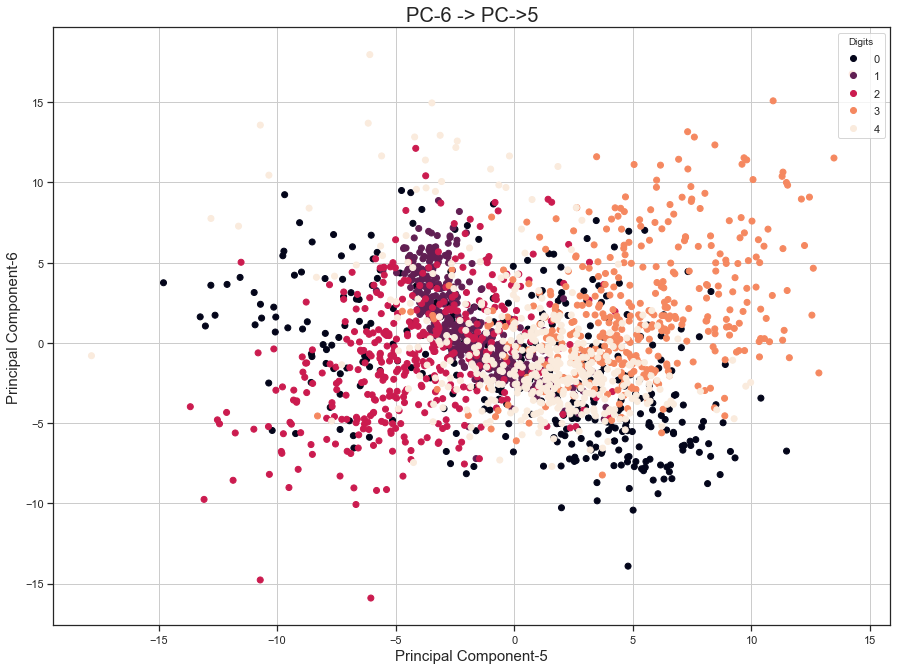

In [40]:
plt.figure(figsize = (15,11))
plt.scatter(projected_data_PCA[:,4], projected_data_PCA[:,5], c = df['gnd'])
plt.xlabel('Principal Component-5', fontsize = 15)
plt.ylabel('Principal Component-6', fontsize = 15)
plt.title('PC-6 -> PC->5', fontsize = 20)
plt.legend(*scatter.legend_elements(prop = 'colors'),
                    loc="upper right", title="Digits")
plt.grid()

 - From the above plot of the data on first and second principal components and fifth and sixth principal components, it can be visualized from the range of the different principal components that the variance described by the first two principal components is greater than the fifth and sixth components.
 - Classes of the MNIST digit dataset have maximum variance in the first principal components describing 6.6% of the total variance. While the second principal component explains 3.67% of the total variance.
 - The explained variance corresponding principal component(individual) having low eigon-values, decrease as can be understood from the plot.
 - Also, the classes look more separated when projected on principal components 1 and 2 compared to the projection on principal components 5 and 6.

#### 4) PCA and Dual PCA
##### PCA

In [41]:
import time
digit_array = np.asarray(df.iloc[:, 1:785])
scalar = StandardScaler()
digit_array = scalar.fit_transform(digit_array)
start = time.time()

#centering the data
digit_mean = np.mean(digit_array.T, axis = 1)
c = digit_array - digit_mean

# Covariance Matrix
cov = ((c.T).dot(c)) / (digit_array.shape[0] - 1)

# Eigen value decomposition of mean centered matrix
eigenvals_PCA, eigenvects_PCA = np.linalg.eig(cov)
# creating an array of eigenvalues and eigenvectors
eigenpairs_PCA = [(np.abs(eigenvals_PCA[i]), eigenvects_PCA[:,i]) for i in range(len(eigenvals_PCA))]
# sort the array on eigenvalues in the descending order
eigenpairs_PCA.sort()
eigenpairs_PCA.reverse()

matrix_w_PCA = eigenpairs_PCA[0][1].reshape(784,1)
for i in range(1,20):
    matrix_w_PCA = np.hstack((matrix_w_PCA, eigenpairs_PCA[i][1].reshape(784,1)))

# project the data on the principal components
projected_data_PCA = c.dot(matrix_w_PCA)
end = time.time()
time_taken = end - start
print('Time taken by PCA: ', time_taken, 'seconds')

reconstruction_PCA = digit_array.dot(matrix_w_PCA.dot(matrix_w_PCA.T))
print('Projected Data by PCA', projected_data_PCA)

Time taken by PCA:  0.22141170501708984 seconds
Projected Data by PCA [[ -9.97069222   6.18172201  -4.99286326 ...  -0.26257488   1.42584762
   -1.16252257]
 [-11.41599978   6.94158705  -5.06302886 ...   0.96317397   1.11655238
    0.06708945]
 [ -3.69011918   4.69309729  -2.9086564  ...   2.65907012  -0.66109634
   -5.12371489]
 ...
 [  0.34942153   0.93368106   8.10744188 ...  -1.28086781   1.19700404
    1.08146006]
 [  3.11526327   2.09047425   6.27251911 ...  -1.30774666  -0.11716451
    1.59384718]
 [  5.64409375  -0.24616663   4.14018317 ...   2.8474039   -1.14882287
   -3.39490069]]


##### Dual PCA

In [42]:
start = time.time()
digit_array = np.asarray(df.iloc[:, 1:785])
scalar = StandardScaler()
digit_array = scalar.fit_transform(digit_array)
#centering the data
digit_mean = np.mean(digit_array.T, axis = 1)
c = digit_array - digit_mean

# Kernel Matrix
R = c.dot(c.T)
print(R.shape)

# Eigen value decomposition of mean centered matrix
eigenvals_dual_PCA, eigenvects_dual_PCA = np.linalg.eigh(R)


# creating an array of eigenvalues and eigenvectors
eig_pairs_dual_PCA = [(np.abs(eigenvals_dual_PCA[i]), eigenvects_dual_PCA[:,i]) for i in range(len(eigenvals_dual_PCA))]
# sort the array on eigenvalues in the descending order
eig_pairs_dual_PCA.sort()
eig_pairs_dual_PCA.reverse()

# computing sigma by taking square-root of top-20 eigenvalues
eigen_values_sorted = [i[0] for i in eig_pairs_dual_PCA[:20]]
sigma = np.diag(eigen_values_sorted) 
sigma = np.sqrt(sigma)

matrix_w_dual_PCA = eig_pairs_dual_PCA[0][1].reshape(2066,1)
for i in range(1, 20):
    matrix_w_dual_PCA = np.hstack((matrix_w_dual_PCA, eig_pairs_dual_PCA[i][1].reshape(2066,1)))

# project the data on the principal components
projected_data = (matrix_w_dual_PCA).dot(sigma)
end = time.time()
time_taken = end - start
print('Time taken by Dual PCA: ', time_taken, 'seconds')
print('Projected Data by dual PCA', projected_data)

(2066, 2066)
Time taken by Dual PCA:  0.8926141262054443 seconds
Projected Data by dual PCA [[ 9.97069222 -6.18172201  4.99286326 ...  0.26257488 -1.42584762
   1.16252257]
 [11.41599978 -6.94158705  5.06302886 ... -0.96317397 -1.11655238
  -0.06708945]
 [ 3.69011918 -4.69309729  2.9086564  ... -2.65907012  0.66109634
   5.12371489]
 ...
 [-0.34942153 -0.93368106 -8.10744188 ...  1.28086781 -1.19700404
  -1.08146006]
 [-3.11526327 -2.09047425 -6.27251911 ...  1.30774666  0.11716451
  -1.59384718]
 [-5.64409375  0.24616663 -4.14018317 ... -2.8474039   1.14882287
   3.39490069]]


For PCA, we decompose the matrix $X^T*X$ which has $d*d$ dimension where $d = 784$ for MNIST dataset whereas for Dual PCA, we decompose the matrix $X*X^T$ which has $n*n$ dimensions where $n = 2066$ for MNIST dataset.
Decomposition of matrix with dimension $2066*2066$ takes longer time than decomposition of matrix with $784*784*$ dimensions. That is why Dual PCA takes more time than PCA.

### 2.2.2 Theoretical Question
#### Prove that PCA is the best linear method for reconstruction (with orthonormal bases).

$\hat{X}$ is the centralized data points in original space and $UU^T\hat{X}$ is reconstruction of projected data

In order to reduce the reconstruction error we need to form an optimization problem and minimize it. <br>
The optimization problem is described as below:<br><br>
\begin{equation*}
\begin{aligned}
& \underset{U}{\text{minimize}}
& & ||\hat{X} - UU^T\hat{X}||_F^{2} \\
& \text{subject to}
& & U^TU = I.
\end{aligned}
\end{equation*}

$||\hat{X} - UU^T\hat{X}||_F^{2}$<br><br>
$= tr((\hat{X} - UU^T\hat{X})^T(\hat{X} - UU^T\hat{X}))$<br><br>
$= tr((\hat{X}^T - \hat{X}^TUU^T)(\hat{X} - UU^T\hat{X}))$<br><br>
$= tr(\hat{X}^T\hat{X} - 2\hat{X}^TUU^T\hat{X} + \hat{X}^TU\underbrace{U^TU}_\text{I}U^T\hat{X})
= tr(\hat{X}^T\hat{X} - \hat{X}^TUU^T\hat{X})$ <br> <br>
$= tr(\hat{X}^T\hat{X}) - tr(\hat{X}^TUU^T\hat{X})$ <br> <br>
$= tr(\hat{X}^T\hat{X}) - tr(\hat{X}\hat{X}^TUU^T)$ <br> <br>
Using Lagrange multiplier, we have: <br>
$\mathcal{L} = tr(\hat{X}^T\hat{X}) - tr(\hat{X}\hat{X}^TUU^T) - tr(\Lambda^T(U^TU - I))$, <br>

where $\Lambda \in \mathbb{R}^{p \times p}$ is a diagonal matrix $diag([\lambda_1,...,\lambda_p]^T)$ containing the Lagrange multipliers. <br>Equating the derivative of Lagrangian to zero gives:<br>

$
\mathbb{R}^{d\times p} \ni \frac{\partial \mathcal{L}}{\partial U} = 2\hat{X}\hat{X}^TU - 2U\Lambda = 0$ <br> <br>
$\implies \hat{X}\hat{X}^TU = U\Lambda,
\implies SU = U\Lambda$ <br> <br>

This is the eigen value problem for the covariance matrix S. We had same eigen value problem in PCA.

PCA subspace is the best linear projection in terms of reconstruction error as reconstruction error is minimized when maximum variance are captured along the data points. In other words, PCA has the least squared error in reconstruction.
<br><br>

## 2.3 Fisher Discriminant Analysis (FDA)
### 2.3.1 Practical Questions
#### 2.3.1.1 Implementation of LDA

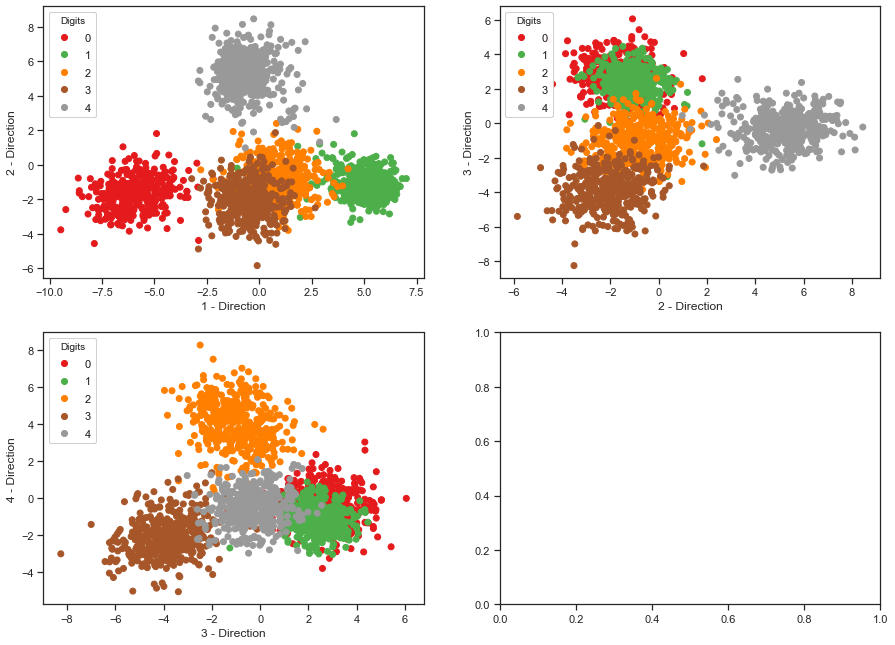

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# selecting 784 features from the dataset
digit_array = np.asarray(df.iloc[:, 1:785])

# Applying LDA on the dataset
LDA = LinearDiscriminantAnalysis()
LDA_data = LDA.fit_transform(digit_array, df['gnd'])
df_LDA = pd.DataFrame(data = np.c_[LDA_data , df['gnd']],columns= ['d1', 'd2', 'd3', 'd4', 'gnd'])

# create 2x2 grid to plot subplots
grid_row = 2
grid_column = 2 
fig, axs = plt.subplots(grid_row, grid_column, figsize=(15, 11))

count = 0
flag = False
for row in range(0, grid_row):
    for column in range(0, grid_column):
        scatter = axs[row,column].scatter(df_LDA.iloc[:,count], df_LDA.iloc[:,count+1], c = df['gnd'], cmap = 'Set1')
        legend1 = axs[row,column].legend(*scatter.legend_elements(prop = 'colors'),
                    loc="upper left", title="Digits")
        axs[row, column].add_artist(legend1)
        axs[row, column].set_xlabel(str(count+1) + ' - Direction')
        axs[row, column].set_ylabel(str(count+2) + ' - Direction')
        count += 1
        if(count == 3):
            flag = True
            break;
    if(flag):
        break;

It can be visualised  from the above plots that different classes can be distinct in different directions. Following are the different directions responsible for different classes;
 - Direction 1 : This direction is responsible for the separation of the digit 0 and digit 1 as it can be observed from cluster spread along the x axis of the first graph.
 - Direction 2 : if projected data on direction 2 then except digit 4 all the other classes are collapsed near to each other. So, only digit 2 can be classified along direction 2.
 - Direction 3 : Direction 3 separates the MNIST digit 3 when projected on it
 - Direction 4 : when data are projected along direction 4 then digit 2 class seems to have separability  from rest of the class.

#### 2.3.1.2 Comparing the results

It can be visualized from the above plots, Projection on principal component 1 and principal component 2 provide good visualization of different classes, but LDA outperforms PCA when it comes to comprehending the separability of classes in lower dimensions. Comparing these results of PCA and LDA it can be said that LDA tries to attain maximum separability of classes across different directions while principal components in PCA are in the direction of the maximum varianc

### 2.3.2 Theoretical Question

#### We can consider the total scatter as the summation of the within and between scatters: $\mathbf{S_T = S_W + S_B \implies\ S_B = S_T - S_W}$. By substituting this into the Fisher criterion, the FDA optimization can be slightly modified to:

\begin{equation*}
\begin{aligned}
& \underset{U}{\text{maximize}}
& & tr(U^TS_TU) \\
& \text{subject to}
& & U^TS_WU = I.
\end{aligned}
\end{equation*}
<br> <br>
Using Lagrange multiplier, we have: <br> <br>
$\mathcal{L} = tr(U^TS_TU) - tr(\Lambda^T(U^TS_WU - I))$ <br> <br>
where $\Lambda \in \mathbb{R}^{d \times d}$ is a diagonal entries are the Lagrange multipliers. Equating the derivative of $\mathcal{L}$ to zero gives: <br> <br>
$\mathbb{R}^{d \times p} \ni \frac{\partial L}{\partial U} = 2S_TU - 2S_WU\Lambda = 0$ <br> <br>
Here $d$ is the dimensions of datapoints and $p$ is the dimension of projection space <br> <br>
$\implies 2S_TU = 2S_WU\Lambda$ <br> <br>
$\implies S_TU = S_WU\Lambda$ <br> <br>
$\implies S_W^{-1}S_TU = U\Lambda$ <br> <br>

Which is a generalized eigenvalue problem ($S_T,S_W$). The columns of U are the eigenvectors sorted by largest to smallest eigenvalues (because the optimization is maximization) and the diagonal entries of Λ are the corresponding eigenvalues. The columns of U are referred to as the Fisher directions or Fisher axes.

The FDA directions can be obtained by the generalized eigenvalue problem (${S_T}, {S_W}$). By comparing the equations, it shows that PCA captures the orthonormal directions with the maximum variance of data. However, the FDA has the same goal but also it requires the manipulated directions to be orthonormal. This manipulation is done by the within scatter which makes sense because the within scatters make use of the class labels. This comparison gives a hint for the connection between PCA and FDA.
From question 2 in a practical question, it is clearly seen that PCA intermingles the classes. There is not a cut point for the dimensions. LDA gives good clear cut dimensions since it considers labels in the data. Suppose there are two different clusters with opposite labels, but still they are placed very near to each other. Most of the data variation in the direction of these clusters. These clusters would be projected onto the direction of the greatest variety of data and it results in the formation of a single cluster of data. So PCA mixes up the clusters without considering the labels. FDA projects the data onto a direction that is orthogonal to the direction of the greatest variation of the data. This direction is in the least variation of the data. These two clusters would then be nearly perfectly separated from each other because of taking into account of their labels.

# 3 Nonlinear Dimensionality Reduction
## 3.1 Dataset

In [44]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
import pandas as pd
import numpy as np

df = pd.read_csv('DataB.csv')
digit_array = np.asarray(df.iloc[:, 1:785])

## 3.2 Practical Questions
### 3.2.1 Embeddings
### (1) kernel PCA

In [45]:
import time
start = time.time()
KPCA = KernelPCA(n_components=2, kernel='rbf', random_state=42)
projected_KPCA = KPCA.fit_transform(digit_array)
end = time.time()
time_taken = end - start

print('Time taken by kernel PCA: ', time_taken)

Time taken by kernel PCA:  0.7559957504272461


### (2) Isomap

In [46]:
start = time.time()
Iso = Isomap(n_components=2)
projected_Isomap = Iso.fit_transform(digit_array)
end = time.time()
time_taken = end - start

print('Time taken by kernel Isomap: ', time_taken)

Time taken by kernel Isomap:  6.9879889488220215


### (3) Locally Linear Embedding (LLE)

In [47]:
start = time.time()
LLE = LocallyLinearEmbedding(n_components=2, random_state=42)
projected_LLE = LLE.fit_transform(digit_array)
end = time.time()
time_taken = end - start
print('Time taken by kernel LLE: ', time_taken)

Time taken by kernel LLE:  5.8655805587768555


### (4) Laplacian Eigenmap

In [48]:
start = time.time()
SE = SpectralEmbedding(n_components=2, random_state=42)
projected_SE = SE.fit_transform(digit_array)
end = time.time()
time_taken = end - start
print('Time taken by kernel LE: ', time_taken)

Time taken by kernel LE:  6.815350532531738


### (5) t-SNE

In [49]:
start = time.time()
tSNE = TSNE(n_components=2, random_state=42)
projected_TSNE = tSNE.fit_transform(digit_array)
end = time.time()
time_taken = end - start
print('Time taken by kernel t-SNE: ', time_taken)

Time taken by kernel t-SNE:  16.863584756851196


## 3.2 Plot and Compare

In [50]:
import matplotlib.pyplot as plt

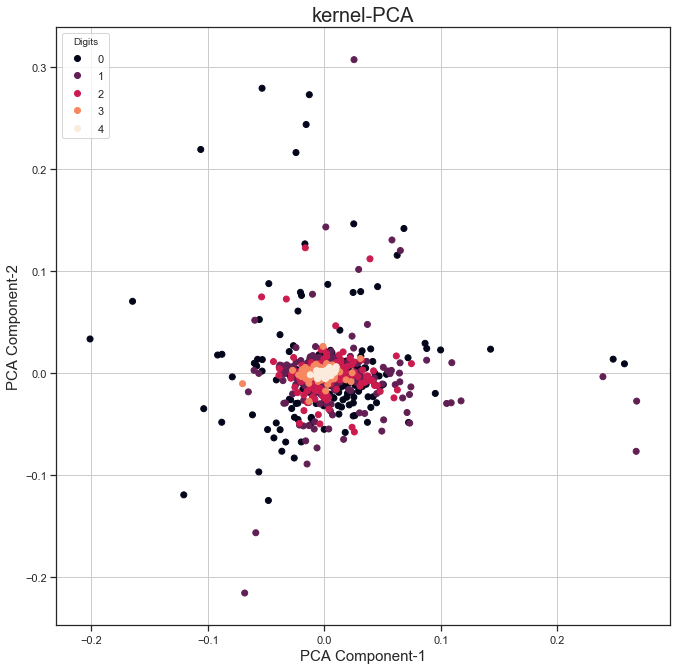

In [51]:
plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_KPCA[:,0], projected_KPCA[:,1], c=df['gnd'])
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper left", title="Digits")
plt.xlabel("PCA Component-1", fontsize = 15)
plt.ylabel("PCA Component-2", fontsize = 15)
plt.title("kernel-PCA", fontsize = 20)
plt.grid()

- The kernel PCA here is using RBF kernel, since the kernel does not know much about the manifold on which the data lies, its performance on MNIST data seems poor.
- Kernel PCA tends to perform good on theoretical analysis, as the kernel to be used is decided beforehand and is independent of properties of data.
- As we can see from the above plot,Kernel PCA is not able to differentiate among different classes.

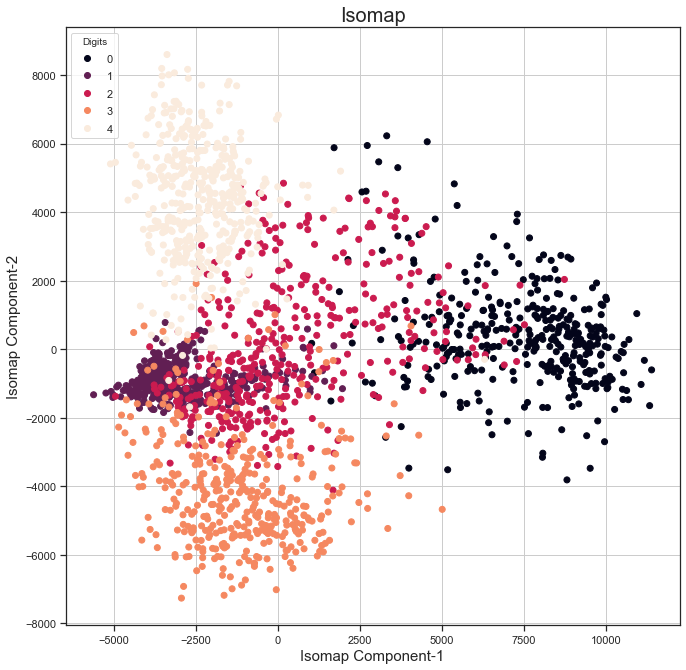

In [52]:
plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_Isomap[:,0], projected_Isomap[:,1], c=df['gnd'])
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper left", title="Digits")
plt.xlabel("Isomap Component-1", fontsize = 15)
plt.ylabel("Isomap Component-2", fontsize = 15)
plt.title("Isomap", fontsize = 20)
plt.grid()

- Isomap uses a k-nearest neighbor graph(to use geodesic distance, here k =5 ) and applies MDS on that graph, thus. It tries to use local distances among nearby points and hence is usually able to unfold the manifold well.
- from the above projections we can see it looks like "octopus" shaped, which can be expected from the theoretical background as it tries to connect a KNN graph.
- It can be seen from the above graph, points 2,3 and 1 share some overlap. In addition to this classes, 4,0 and 3 look well separated.

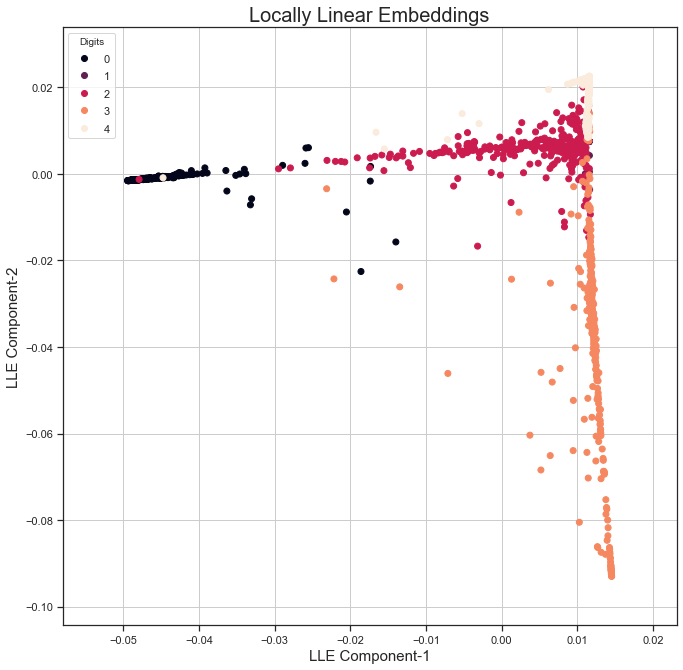

In [53]:
plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_LLE[:,0], projected_LLE[:,1], c=df['gnd'])
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper left", title="Digits")
plt.xlabel("LLE Component-1", fontsize = 15)
plt.ylabel("LLE Component-2", fontsize = 15)
plt.title("Locally Linear Embeddings", fontsize = 20)
plt.grid()

- The result of LLE is almost symmetric it can be attributed as optimization of uses the constraint of unit covariance. (It assumes the dense distribution of data points in original space, and does not perform well in presence of outliers in the original data)
- Classes 0,2,3 and 4 looks well separated from each other, whereas there is substantial overlap among class 1 and classes 2,3 and 4.
- LLE is sensitive to outliers and noise. Datasets have a varying density and it is not always possible to have a smooth manifold. In these cases, LLE gives a poor result.
(Reference: https://blog.paperspace.com/dimension-reduction-with-lle/)

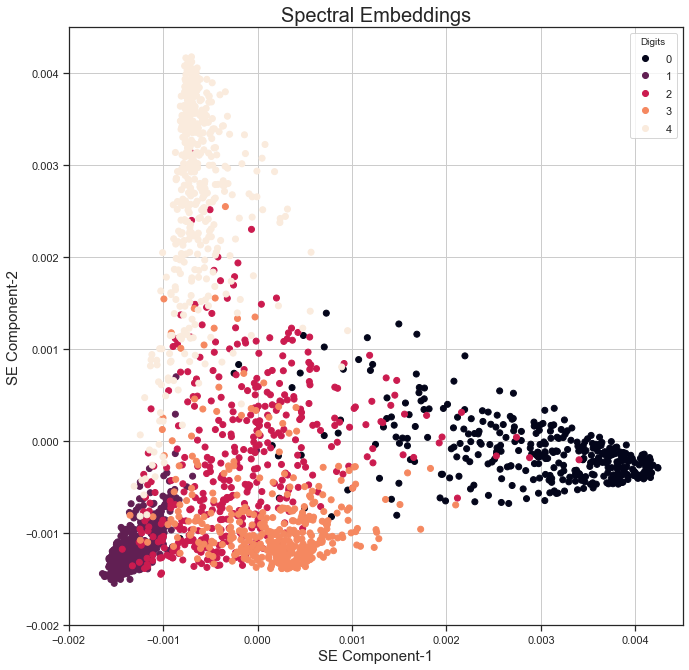

In [54]:
plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_SE[:,0], projected_SE[:,1], c=df['gnd'])
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper right", title="Digits")
plt.xlabel("SE Component-1", fontsize = 15)
plt.ylabel("SE Component-2", fontsize = 15)
plt.title("Spectral Embeddings", fontsize = 20)
plt.xlim(-0.002, 0.0045)
plt.ylim(-0.002, 0.0045)
plt.grid()

From the above plot and theoretical background on Laplacian eigenmaps, we have the following observations :
   - Datapoints sharing similar features look very close to each other in the lower dimensional space, this can be attributed to one-directional cost function used for the Laplacian eigenmaps algorithm, which penalizes cost if we do not maintain the high similarity(in projected space) among the most similar points(from the original space).
   - The cluster of data looks good and compact.
   - it can be visualized that classes 0,3 and 4 looks separated from the rest of the classes.

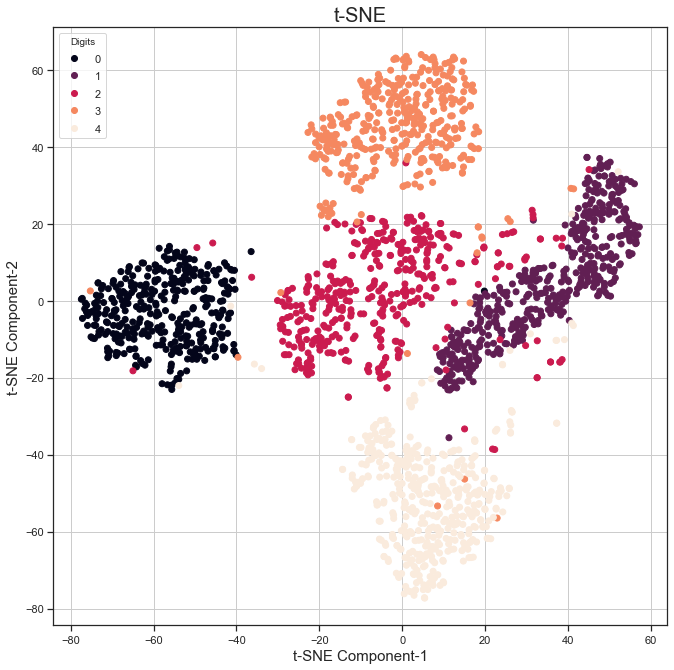

In [55]:
plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_TSNE[:,0], projected_TSNE[:,1], c=df['gnd'])
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper left", title="Digits")
plt.xlabel("t-SNE Component-1", fontsize = 15)
plt.ylabel("t-SNE Component-2", fontsize = 15)
plt.title("t-SNE", fontsize = 20)
plt.grid()

As expected, t-SNE separates classes well, following are the observations from the above plot and theory :
   - Most Classes form spherical/ t-distribution patches, which can be attributed to the use of t distribution in the theoretical framework for t-SNE.
   - Classes are separated well, i.e. there is a significant distance among the patches for different classes, thus it can be understood as t-SNE deals with the probabilities and also these are further multiplied(probabilities) by a factor of 4.
   - There is very little overlap shared among different categories.
   - all classes; 0,1,2,3,4 looks well separated in t-SNE transformed 2-d plot with very few data points outside the class patches.

## Comparison

 - It can be seen from the plots above, the similar digits almost fall in the same clusters and different digits are separated acceptably. The t-SNE shows the best results among other methods.
 - Kernel PCA does not have satisfactory results because of the choice of kernels which are not optimum for given data. The other methods have acceptable performance.[1] <br>

 Performance-based on time
 - Isomap, LLE, SE, takes around 6 seconds, Kernel-PCA takes around 0.6 seconds which is almost one-tenth of the time taken by    Isomap, LLE, SE. 
 - t-SNE takes around 18 seconds which is almost thrice the time taken by Isomap, LLE, SE. Here, the number of neighbors was not specified for Isomap and LLE so it takes the default value of 5 neighbors.
 
 t-SNE vs KPCA:
  - t-SNE takes more time than KPCA as t-SNE is based on iteratively placing points together on lower dimension space(by converting pairwise distances to probabilities). It has a non-convex cost function while KPCA has an optimized solution.
  - t-SNE clearly distinguished between different classes of data well as can be depicted from the above graph. Whereas, KPCA does not seem to be able to distinguish the classes.
  - t-SNE can maintain the distance between various classes, whereas the classes projected by KPCA show overlap between most of the classes.
  
  The tradeoff for best methods:
  - Time: Different algorithm takes different time, if the time for execution is the constraint then, Isomap, SE and LLE are a better choice
  - Separability: t-SNE separates between different classes more clearly than any other method but it takes a longer time. So in the situation where separation is more important than the time is taken, t-SNE is a better choice.

## References:
1) B. Ghojogh, M. N. Samad, S. A. Mashhadi, T. Kapoor, W. Ali, F. Karray and M. Crowley, "Feature Selection and Feature       Extraction in Pattern Analysis: A Literature Review", arXiv:1905.02845v1, 7 May 2019<br><br>
2) B. Ghojogh,M. Crowley, "Unsupervised and Supervised Principal Component Analysis: Tutorial", arXiv:1906.03148v1, 1 Jun 2019<br><br>
3) B. Ghojogh, F. Karray and M. Crowley, "Fisher and Kernel Fisher Discriminant Analysis: Tutorial", arXiv:1906.09436v1, 22 Jun 2019
